Preface :
Data Analysis Objective: To predict the absenteeism in hours for the employee based on the person's personal details such as age , height , weight , BMI , number of children , education etc .Other  work related attributes such as length of service , month and season of absenteeism , travel time to work etc 

File : 
MetaData : 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pandas.plotting import scatter_matrix
%matplotlib inline 

In [2]:
from sklearn.linear_model import LinearRegression , Lasso
from sklearn.tree import DecisionTreeRegressor

In [3]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [4]:
from sklearn.model_selection import train_test_split , cross_val_score , cross_val_predict, KFold

In [5]:
from sklearn.metrics import mean_squared_error , r2_score

In [6]:
from sklearn.neighbors import KNeighborsRegressor

In [7]:
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures

In [8]:
from sklearn.neural_network import MLPRegressor

In [9]:
absentee_data = pd.read_csv('Absenteeism_at_work.csv', header = 0, sep = ';', engine = 'python')

In [10]:
## Look into the variables 
absentee_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
ID                                 740 non-null int64
Reason for absence                 740 non-null int64
Month of absence                   740 non-null int64
Day of the week                    740 non-null int64
Seasons                            740 non-null int64
Transportation expense             740 non-null int64
Distance from Residence to Work    740 non-null int64
Service time                       740 non-null int64
Age                                740 non-null int64
Work load Average/day              740 non-null float64
Hit target                         740 non-null int64
Disciplinary failure               740 non-null int64
Education                          740 non-null int64
Son                                740 non-null int64
Social drinker                     740 non-null int64
Social smoker                      740 non-null int64
Pet                          

In [11]:
absentee_data.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2


In [12]:
## Look into each variable's min, max , mean value 
absentee_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,740.0,18.017568,11.021247,1.000,9.000,18.000,28.000,36.000
Reason for absence,740.0,19.216216,8.433406,0.000,13.000,23.000,26.000,28.000
Month of absence,740.0,6.324324,3.436287,0.000,3.000,6.000,9.000,12.000
Day of the week,740.0,3.914865,1.421675,2.000,3.000,4.000,5.000,6.000
Seasons,740.0,2.544595,1.111831,1.000,2.000,3.000,4.000,4.000
Transportation expense,740.0,221.329730,66.952223,118.000,179.000,225.000,260.000,388.000
Distance from Residence to Work,740.0,29.631081,14.836788,5.000,16.000,26.000,50.000,52.000
Service time,740.0,12.554054,4.384873,1.000,9.000,13.000,16.000,29.000
Age,740.0,36.450000,6.478772,27.000,31.000,37.000,40.000,58.000
Work load Average/day,740.0,271.490235,39.058116,205.917,244.387,264.249,294.217,378.884


In [13]:
## Check for null values 
absentee_data.isnull().sum()

ID                                 0
Reason for absence                 0
Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Average/day              0
Hit target                         0
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Weight                             0
Height                             0
Body mass index                    0
Absenteeism time in hours          0
dtype: int64

In [14]:
absentee_data.columns

Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours'],
      dtype='object')

In [15]:
## Rename some column names so that they are short and which eases coding.

names = {"Reason for absence" : "Reason",
        "Month of absence" : "Month",
        "Day of the week" : "Day",
        'Transportation expense' : 'Transport_expense',
        'Distance from Residence to Work' : 'Residence_to_work_dist',
        'Service time' : 'Service_time' ,
        'Work load Average/day ' : 'Work_load_avg',
        'Hit target': 'Hit_target',
        'Disciplinary failure':'Disp_failure',
        'Social drinker': 'Social_drinker',
        'Social smoker': 'Social_smoker',
        'Body mass index': 'Bmi',
        'Absenteeism time in hours' : 'Absentee_hours'}

In [16]:
absentee_data.rename(index = str ,columns = names , inplace = True)

In [17]:
## Look into zero value in  Absentee hours
absentee_data[absentee_data['Absentee_hours'] == 0].shape

(44, 21)

In [18]:
absentee_data[absentee_data['Absentee_hours'] == 0].shape[0]/absentee_data.shape[0]

0.05945945945945946

These are 5% of the total records . Are the zero value 'Absentee_hours' valid values or a manual error? 

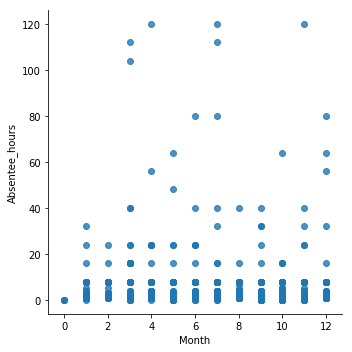

In [22]:
## Exploratory Data Analysis 
## Month (Categorical variable) Vs Absentee Hours 

import seaborn as sns 
sns.lmplot('Month', 'Absentee_hours', data = absentee_data, fit_reg = None)

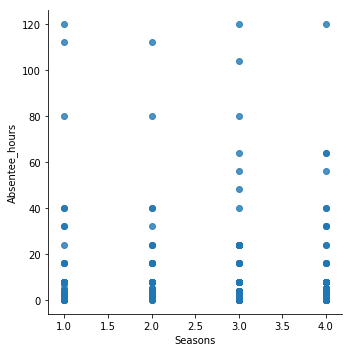

In [24]:
## Seasons(Categorical Variable) Vs Absentee Hours 

sns.lmplot('Seasons', 'Absentee_hours', data = absentee_data , fit_reg = None)

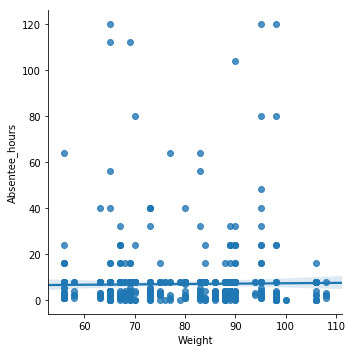

In [25]:
## Weight Vs Absentee Hours 

sns.lmplot('Weight', 'Absentee_hours', data = absentee_data)

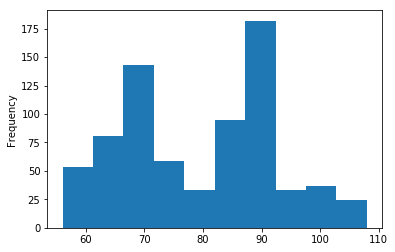

In [26]:
absentee_data['Weight'].plot(kind = 'hist')

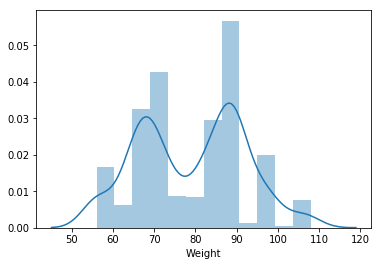

In [27]:
sns.distplot(absentee_data['Weight'])

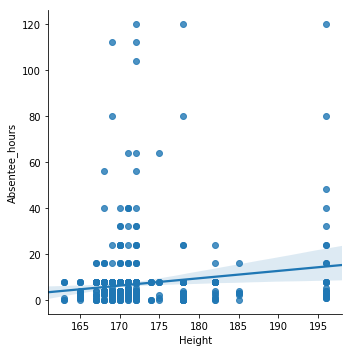

In [28]:
## Height Vs Absentee Hours 
sns.lmplot('Height', 'Absentee_hours', data = absentee_data)

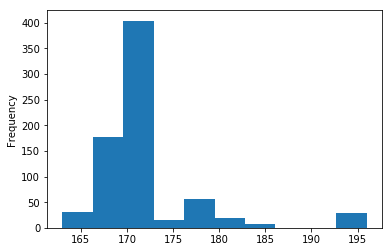

In [29]:
absentee_data['Height'].plot(kind = 'hist')

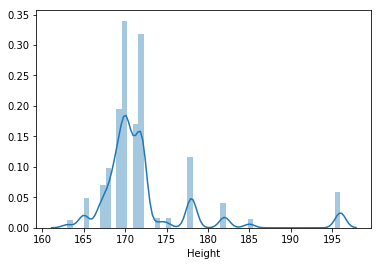

In [30]:
sns.distplot(absentee_data['Height'])

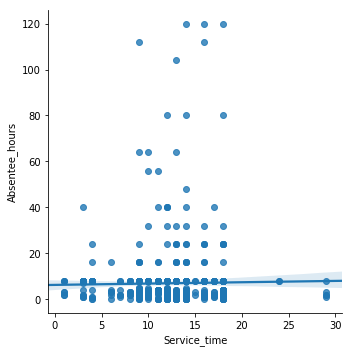

In [31]:
## Service_time  Vs Absentee Hours 
sns.lmplot('Service_time', 'Absentee_hours', data = absentee_data)

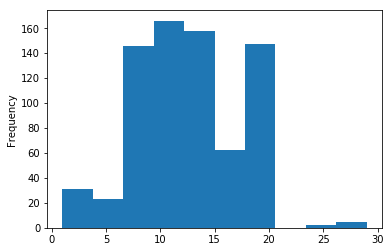

In [32]:
absentee_data['Service_time'].plot(kind = 'hist')

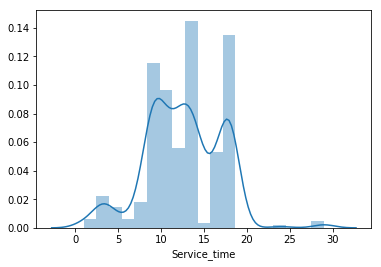

In [33]:
sns.distplot(absentee_data['Service_time'])

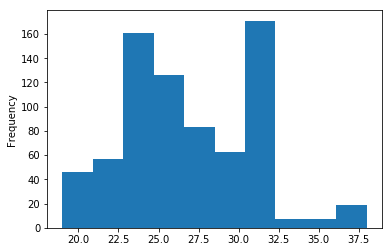

In [34]:
absentee_data['Bmi']. plot(kind = 'hist')

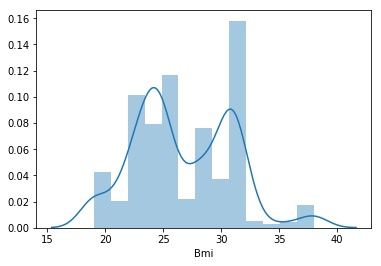

In [35]:
sns.distplot(absentee_data['Bmi'])

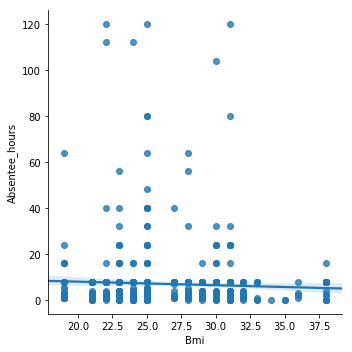

In [36]:
## Bmi Vs Absentee Hours 
sns.lmplot('Bmi', 'Absentee_hours', data = absentee_data)

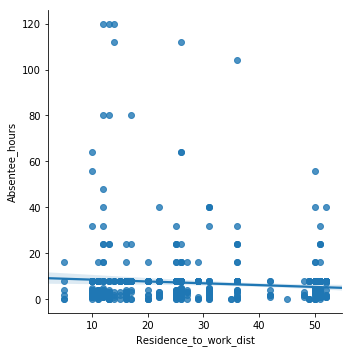

In [37]:
## Residence_to_work_dist Vs Absentee Hours 
sns.lmplot('Residence_to_work_dist', 'Absentee_hours', data = absentee_data)

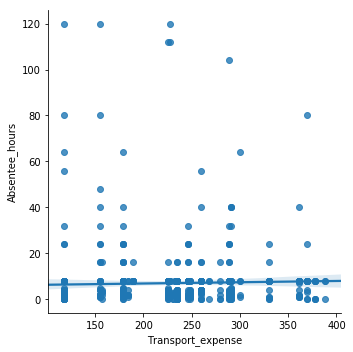

In [38]:
## Transport_expense Vs Absentee Hours 
sns.lmplot('Transport_expense', 'Absentee_hours', data = absentee_data)

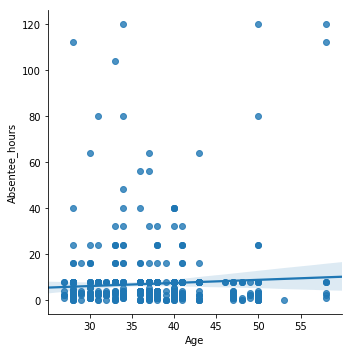

In [39]:
## Age Vs Absentee Hours 
sns.lmplot('Age', 'Absentee_hours', data = absentee_data)

0    298
1    229
2    156
4     42
3     15
Name: Son, dtype: int64

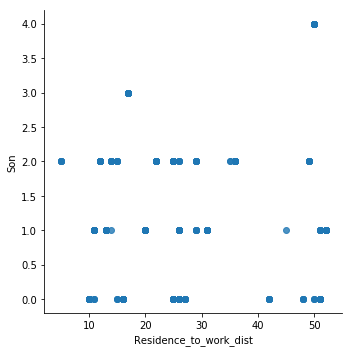

In [40]:
## Son Vs Residence_to_work_dist 
#plt.scatter(absentee_data['Residence_to_work_dist'], absentee_data['Son'])

sns.lmplot('Residence_to_work_dist', 'Son', data = absentee_data, fit_reg = False)

absentee_data['Son'].value_counts()

In [41]:
## Add features 

## Can sick children be one of the factors for predicting absentee hours ? The more far is the residence and more number of children ,
## more likely is the longer absentee hours . 

## Multiplying the effect of Residence to work distance with the number of children.
absentee_data['Sick_children'] = absentee_data['Son']*absentee_data['Residence_to_work_dist']

## Multiplicative effecfive of Age on Bmi 
absentee_data['Age_Bmi'] = absentee_data['Age']*absentee_data['Bmi']

## Add polynomial features.

In [42]:
absentee_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 740 entries, 0 to 739
Data columns (total 23 columns):
ID                        740 non-null int64
Reason                    740 non-null int64
Month                     740 non-null int64
Day                       740 non-null int64
Seasons                   740 non-null int64
Transport_expense         740 non-null int64
Residence_to_work_dist    740 non-null int64
Service_time              740 non-null int64
Age                       740 non-null int64
Work_load_avg             740 non-null float64
Hit_target                740 non-null int64
Disp_failure              740 non-null int64
Education                 740 non-null int64
Son                       740 non-null int64
Social_drinker            740 non-null int64
Social_smoker             740 non-null int64
Pet                       740 non-null int64
Weight                    740 non-null int64
Height                    740 non-null int64
Bmi                       740 non-null int6

In [43]:
## check correlation between the continuous variables. 
absentee_data[['Hit_target','Work_load_avg','Age_Bmi','Sick_children','Transport_expense','Age','Height','Weight','Bmi','Service_time', 'Residence_to_work_dist','Work_load_avg','Absentee_hours']].corr()

,Hit_target,Work_load_avg,Age_Bmi,Sick_children,Transport_expense,Age,Height,Weight,Bmi,Service_time,Residence_to_work_dist,Work_load_avg,Absentee_hours
Hit_target,1.000000,-0.089445,-0.077994,-0.020788,-0.080193,-0.039224,0.093267,-0.044947,-0.088939,-0.007840,-0.013865,-0.089445,0.026695
Work_load_avg,-0.089445,1.000000,-0.072314,-0.004977,0.005438,-0.039425,0.103315,-0.038522,-0.090709,-0.000668,-0.068677,1.000000,0.024749
Age_Bmi,-0.077994,-0.072314,1.000000,-0.148264,-0.231303,0.857691,-0.111465,0.761653,0.849770,0.672569,-0.033455,-0.072314,-0.001768
Sick_children,-0.020788,-0.004977,-0.148264,1.000000,0.399855,-0.050738,-0.174168,-0.244818,-0.187328,-0.164542,0.340166,-0.004977,0.046967
Transport_expense,-0.080193,0.005438,-0.231303,0.399855,1.000000,-0.227542,-0.194496,-0.207435,-0.136517,-0.349887,0.262183,0.005438,0.027585
Age,-0.039224,-0.039425,0.857691,-0.050738,-0.227542,1.000000,-0.062997,0.418730,0.470688,0.670979,-0.145886,-0.039425,0.065760
Height,0.093267,0.103315,-0.111465,-0.174168,-0.194496,-0.062997,1.000000,0.306802,-0.121049,-0.053135,-0.353372,0.103315,0.144420
Weight,-0.044947,-0.038522,0.761653,-0.244818,-0.207435,0.418730,0.306802,1.000000,0.904117,0.455975,-0.047859,-0.038522,0.015789
Bmi,-0.088939,-0.090709,0.849770,-0.187328,-0.136517,0.470688,-0.121049,0.904117,1.000000,0.499718,0.113772,-0.090709,-0.049719
Service_time,-0.007840,-0.000668,0.672569,-0.164542,-0.349887,0.670979,-0.053135,0.455975,0.499718,1.000000,0.131730,-0.000668,0.019029


Its seen that  Age , Height , Residence_to_work_dist have a correlation of > +- 0.05 with Absentee_hours

In [44]:
## Seperate out the continuous variables and categorical variables. 
cat_var = ['Reason','Month','Day','Seasons','Son','Education','Social_drinker','Social_smoker','Pet','Disp_failure','Service_time','Absentee_hours']

cont_var = ['Transport_expense','Residence_to_work_dist','Age','Work_load_avg','Hit_target','Weight','Height','Bmi','Absentee_hours']


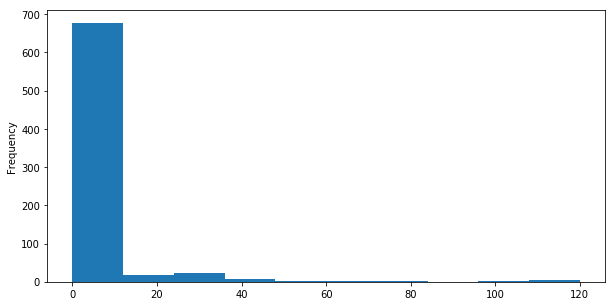

In [45]:
## Explore the absentee_hours -the target variable
plt.figure(figsize = (10,5))
absentee_data['Absentee_hours'].plot(kind = 'hist')

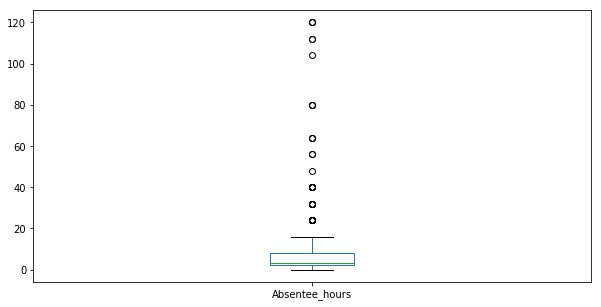

In [46]:
## Plot box plot to look into the outliers .
plt.figure(figsize = (10,5))
absentee_data['Absentee_hours'].plot(kind = 'box')

In [47]:
absentee_data.loc[absentee_data['Absentee_hours'] > 20,].shape

(44, 23)

In [48]:
absentee_data.loc[absentee_data['Absentee_hours'] > 20,].shape[0]/absentee_data.shape[0]

0.05945945945945946

5% of the data are outliers . 

Transform the response variable in order to attempt regression.

Text(0.5,1,'Fifth root transformation')

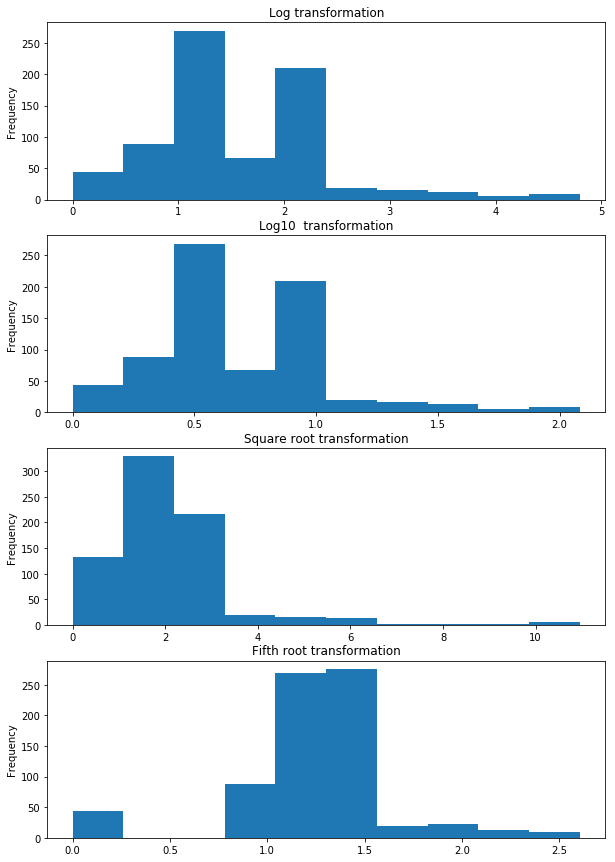

In [49]:
## Transforming the response variable - Absentee_hours. Plot the various transformations to check which is near to a normal distribution

plt.figure(figsize = (10,15))
plt.subplot(411) 
absentee_data['Absentee_hours'].apply(lambda x: np.log(x+1)).plot(kind = 'hist')
plt.title('Log transformation')

plt.subplot(412) 
absentee_data['Absentee_hours'].apply(lambda x: np.log10(x+1)).plot(kind = 'hist')
plt.title('Log10  transformation')

plt.subplot(413) 
absentee_data['Absentee_hours'].apply(lambda x: np.sqrt(x)).plot(kind = 'hist')
plt.title('Square root transformation')

plt.subplot(414) 
absentee_data['Absentee_hours'].apply(lambda x: x**(1/5)).plot(kind = 'hist')
plt.title('Fifth root transformation')


In [50]:
## Create the new variables for  Square root and fifth root transformation.

absentee_data['Absentee_hrs_sqrt'] = absentee_data['Absentee_hours'].apply(lambda x: np.sqrt(x))
absentee_data['Absentee_hrs_5thR'] = absentee_data['Absentee_hours'].apply(lambda x: x**(1/5))

## Absentee hours in days , assuming day is 8 hours

absentee_data['Absentee_days'] = absentee_data['Absentee_hours']/8


In [52]:
## Check the correlation between variables and the response as well as transformed response variable

correlation = absentee_data[['Hit_target','Work_load_avg','Age_Bmi','Sick_children','Transport_expense','Age','Height','Weight','Bmi','Service_time', 'Residence_to_work_dist','Work_load_avg','Absentee_hrs_sqrt','Absentee_hours','Absentee_hrs_5thR','Absentee_days']].corr()['Absentee_hours']
correlation.sort_values(ascending = False)

Absentee_days             1.000000
Absentee_hours            1.000000
Absentee_hrs_sqrt         0.913245
Absentee_hrs_5thR         0.634803
Height                    0.144420
Age                       0.065760
Sick_children             0.046967
Transport_expense         0.027585
Hit_target                0.026695
Work_load_avg             0.024749
Work_load_avg             0.024749
Service_time              0.019029
Weight                    0.015789
Age_Bmi                  -0.001768
Bmi                      -0.049719
Residence_to_work_dist   -0.088363
Name: Absentee_hours, dtype: float64

The following variables : Height ,Age , Residence_to_work_dist, Disp_failure have a correlation of >= +- 0.05 with Absentee_hours

In [53]:
## Check the correlation between variables and the transformed response

correlation_xfomed = absentee_data[['Hit_target','Work_load_avg','Age_Bmi','Sick_children','Transport_expense','Age','Height','Weight','Bmi','Service_time', 'Residence_to_work_dist','Work_load_avg','Absentee_hrs_sqrt','Absentee_hours','Absentee_hrs_5thR','Absentee_days']].corr()['Absentee_hrs_sqrt']
correlation_xfomed.sort_values(ascending = False)

Absentee_hrs_sqrt         1.000000
Absentee_days             0.913245
Absentee_hours            0.913245
Absentee_hrs_5thR         0.864108
Height                    0.136680
Sick_children             0.080673
Transport_expense         0.076702
Hit_target                0.045507
Work_load_avg             0.042019
Work_load_avg             0.042019
Age                       0.000860
Weight                   -0.003220
Service_time             -0.010389
Residence_to_work_dist   -0.052050
Age_Bmi                  -0.054017
Bmi                      -0.067052
Name: Absentee_hrs_sqrt, dtype: float64

The Variables : height , residence_to_work_dist , transport_expense, Bmi ,sick_children have a corelation > +-0.05 with absentee_hours_sqrt.

In [54]:
## Check the correlation between variables and the transformed response

absentee_data[['Hit_target','Work_load_avg','Age_Bmi','Sick_children','Transport_expense','Age','Height','Weight','Bmi','Service_time', 'Residence_to_work_dist','Work_load_avg','Absentee_hrs_sqrt','Absentee_hours','Absentee_hrs_5thR','Absentee_days']].corr()['Absentee_hrs_5thR'].sort_values(ascending = False)

Absentee_hrs_5thR         1.000000
Absentee_hrs_sqrt         0.864108
Absentee_days             0.634803
Absentee_hours            0.634803
Hit_target                0.100219
Height                    0.090620
Sick_children             0.053408
Transport_expense         0.040844
Work_load_avg             0.014390
Work_load_avg             0.014390
Residence_to_work_dist    0.006833
Service_time             -0.022362
Weight                   -0.048126
Age                      -0.077824
Bmi                      -0.092727
Age_Bmi                  -0.115095
Name: Absentee_hrs_5thR, dtype: float64

THe variables : Height , Hit_target ,Sick_children, Age_Bmi  have  a correlation  > +-0.05 with absentee_hours_5thR.

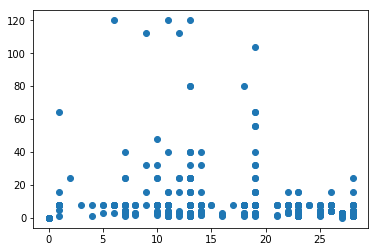

In [55]:
## Looking into Reason and Absentee_hours .
plt.scatter(absentee_data['Reason'], absentee_data['Absentee_hours'] )

Analysing based on Reason code : 
1.For reason code > 20 , the absentee hours don't exceed 20 . What are those reasons ? 
Ans - These are the categories that don't belong to the ICD i.e International Code of Diseases
2. What are the reasons for absentee hours >=100 ?
Ans - Diseases of nervous system(6) , circulatory system (9), digestive system (11), musculoskeletal system and connective tissue (13) , Diseases of the skin and subcutaneous tissue (12),Injury, poisoning and certain other consequences of external causes  (19)  
4. What are the most common reasons for absenteeism ? 
Ans - Medical consultation (23) , dental consultation (28), physiotherapy(27) are the most common reasons .
5. Which reasons has the maximum sum of absentee hours ?
Ans - Diseases of the musculoskeletal system and connective tissue (13) , External causes of morbidity and mortality (19) , medical consultation (23), dental consultation (28) have the maximum sum of absentee hours .
6. What are the reasons for the outliers ? i.e absentee hours > 20
Ans - 19 - Injury, poisoning and certain other consequences of external causes , 13 - Diseases of the musculoskeletal system and connective tissue , 12 - Diseases of the skin and subcutaneous tissue , 11 - Diseases of the digestive system etc  

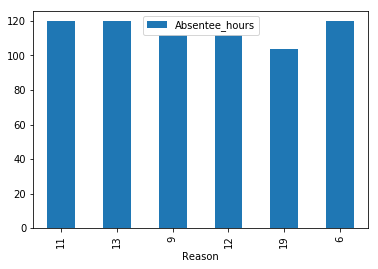

In [56]:
absentee_data.loc[absentee_data['Absentee_hours'] >= 100,['Absentee_hours','Reason']].plot(kind = 'bar', x= 'Reason', y = 'Absentee_hours')

Diseases of nervous system(6) , circulatory system (9), digestive system (11), musculoskeletal system and connective tissue (13) , Diseases of the skin and subcutaneous tissue (12),Injury, poisoning and certain other consequences of external causes  (19)  

Text(0.5,1,'Reason counts')

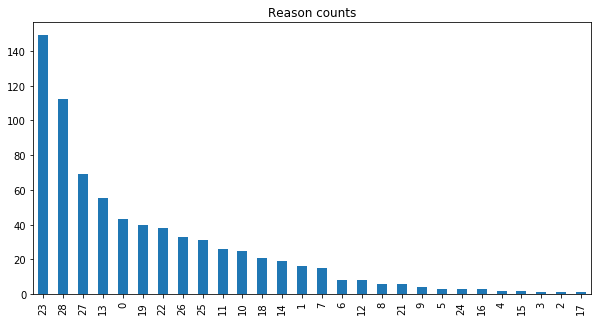

In [57]:
plt.figure(figsize = (10,5))
absentee_data['Reason'].value_counts().plot(kind = 'bar')
plt.title("Reason counts")

Medical consultation , dental consultation , physiotherapy are the most common reasons . 

Text(0.5,1,'Sum of Absentee Hours by Reason')

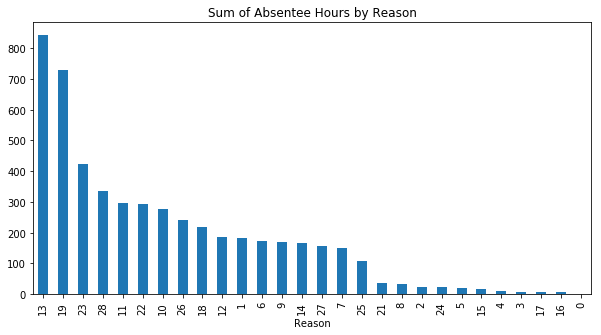

In [58]:
plt.figure(figsize = (10,5))
absentee_data.groupby('Reason')['Absentee_hours'].sum().sort_values(ascending = False).plot(kind = 'bar')
plt.title("Sum of Absentee Hours by Reason")

Diseases of the musculoskeletal system and connective tissue (13) , External causes of morbidity and mortality (19) , medical consultation (23), dental consultation (28) have the maximum sum of absentee hours .


Endocrine, nutritional and metabolic diseases  , Diseases of the blood and blood-forming organs and certain disorders involving the immune mechanism  , Congenital malformations, deformations and chromosomal abnormalities ,Certain conditions originating in the perinatal period have least absentee hours 

In [59]:
## What is the percentage of the outliers in the data ?

absentee_data[absentee_data['Absentee_hours'] > 20].shape[0] / absentee_data.shape[0]

## 5% 

0.05945945945945946

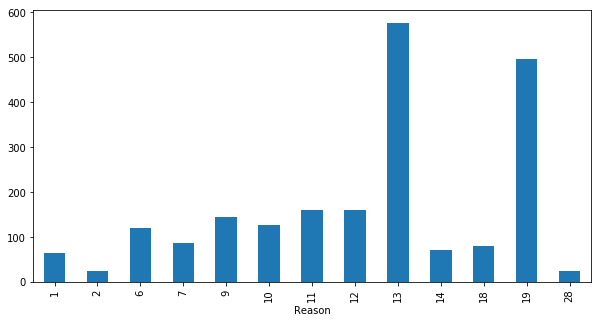

In [60]:
## Reasons for Absentee_hours > 20 

plt.figure(figsize = (10,5))
absentee_data[absentee_data['Absentee_hours'] > 20].groupby('Reason')['Absentee_hours'].sum().plot.bar()

The Reasons for the outliers are: 19 - Injury, poisoning and certain other consequences of external causes , 13 - Diseases of the musculoskeletal system and connective tissue , 12 - Diseases of the skin and subcutaneous tissue , 11 - Diseases of the digestive system etc  

Linear Regression:

In [61]:
## Hot encode categorical variables  

def hot_encode(df, cols):
    ## Change the categorical columns to dummy variables . 
    
    for c in cols:
        col_dummies = pd.get_dummies(df[c], prefix_sep = "_", prefix = c)
        df = pd.concat([df,col_dummies] , axis = 1)
        df.drop(c , inplace = True , axis = 1)
    return df

In [62]:
## hot encode the categorical variables.
cat_var = ['Reason','Day','Son','Social_drinker', 'Disp_failure','Hit_target','Seasons', 'Education']
correlated_var = ['Reason','Day','Son','Social_drinker', 'Height', 'Residence_to_work_dist','Age','Disp_failure', 'Transport_expense','Age_Bmi','Sick_children','Hit_target','Seasons','Education']

In [63]:
predictors = absentee_data[correlated_var]
predictors = hot_encode(predictors, cat_var)

In [64]:
predictors.info()

<class 'pandas.core.frame.DataFrame'>
Index: 740 entries, 0 to 739
Data columns (total 69 columns):
Height                    740 non-null int64
Residence_to_work_dist    740 non-null int64
Age                       740 non-null int64
Transport_expense         740 non-null int64
Age_Bmi                   740 non-null int64
Sick_children             740 non-null int64
Reason_0                  740 non-null uint8
Reason_1                  740 non-null uint8
Reason_2                  740 non-null uint8
Reason_3                  740 non-null uint8
Reason_4                  740 non-null uint8
Reason_5                  740 non-null uint8
Reason_6                  740 non-null uint8
Reason_7                  740 non-null uint8
Reason_8                  740 non-null uint8
Reason_9                  740 non-null uint8
Reason_10                 740 non-null uint8
Reason_11                 740 non-null uint8
Reason_12                 740 non-null uint8
Reason_13                 740 non-null uint8


In [65]:
## Function for splitting data into train and test , applying the model on train data and check the predicted values for train and test data .
def perform_reg(model , predictors , target):
    
    X_train,X_test,y_train,y_test = train_test_split(predictors , target , random_state = 1 , test_size = 0.2)
    
    print("X train size: {}".format(X_train.shape))
    print("X test size: {}".format(X_test.shape))
    print("y train size: {}".format(y_train.shape))
    print("y test size: {}".format(y_test.shape))
    
    model.fit(X_train, y_train)

    train_pred = model.predict(X_train)
    train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))

    test_pred = model.predict(X_test)
    test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))

    print("\ntrain rmse: {}".format(train_rmse))
    print("test rmse: {}".format(test_rmse))

    print("train R2 : {}".format(r2_score(y_train , train_pred)))
    print("test  R2 : {}".format(r2_score(y_test, test_pred)))
    
    ## Check for any pattern in the Residual Vs Response plot 

    train_resid = y_train - train_pred
    test_resid = y_test - test_pred

    plt.figure(figsize = (12,5))
    plt.subplot(121)
    plt.scatter(y_train , train_resid)
    plt.xlabel("y_train")
    plt.ylabel("residual ")

    plt.subplot(122)
    plt.scatter(y_test , test_resid)
    plt.xlabel('y_test')
    plt.ylabel("residual")
    
    ## Plot Residual Vs Predicted  plot 

    plt.figure(figsize = (12,5))
    plt.subplot(121)
    plt.scatter(train_pred , train_resid)
    plt.xlabel("train predicted")
    plt.ylabel("residual ")

    plt.subplot(122)
    plt.scatter(test_pred , test_resid)
    plt.xlabel('test predicted')
    plt.ylabel("residual")
    
    plt.figure(figsize = (12,5))
    plt.subplot(121)
    plt.scatter(y_train, train_pred)
    plt.xlabel("train")
    plt.ylabel("predicted")
    
    plt.subplot(122)
    plt.scatter(y_test , test_pred)
    plt.xlabel("test")
    plt.ylabel("predicted")
        
    return    

X train size: (592, 69)
X test size: (148, 69)
y train size: (592,)
y test size: (148,)

train rmse: 10.606442138432863
test rmse: 14.574362117226721
train R2 : 0.29708744735008585
test  R2 : 0.14017529427156017


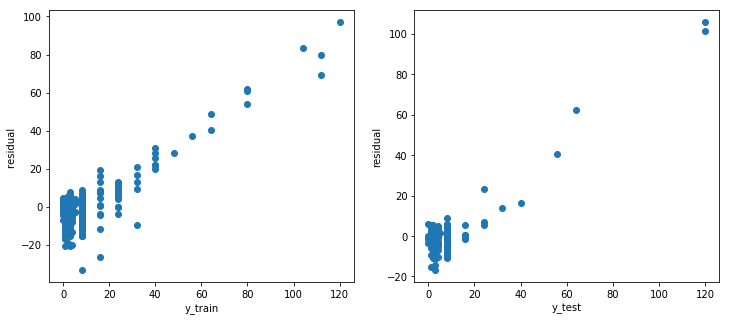

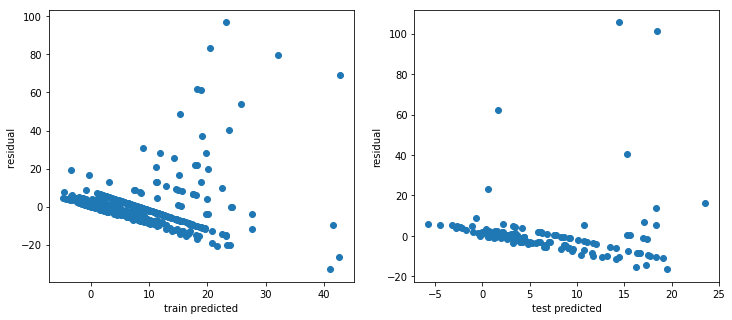

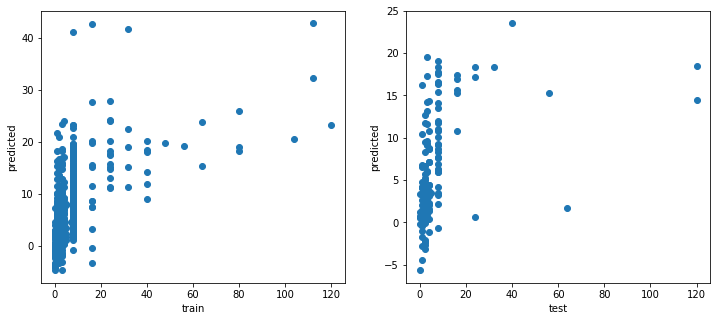

In [66]:
## Linear Regression with all the variables and the original response variable - Absentee_hours

target = absentee_data['Absentee_hours']
Ln = LinearRegression()
perform_reg(Ln,predictors, target)

In [67]:
## Cross validate and check the performance . 

kf = KFold(n_splits = 5, shuffle = True , random_state = 3)
scores = cross_val_score(Ln, predictors , target , cv = kf )
print(" 5 fold cross validation scores : {}".format(scores))
print("Mean score with 5 fold cross validation :{}".format(np.mean(cross_val_score(Ln, predictors , target , cv = kf ))))

 5 fold cross validation scores : [-0.18227011 -0.23014415 -0.00896039  0.12417358  0.15675316]
Mean score with 5 fold cross validation :-0.028089579939883723


X train size: (592, 69)
X test size: (148, 69)
y train size: (592,)
y test size: (148,)

train rmse: 1.0587378419109819
test rmse: 1.3273120532788318
train R2 : 0.48385747596936557
test  R2 : 0.3102997079640184


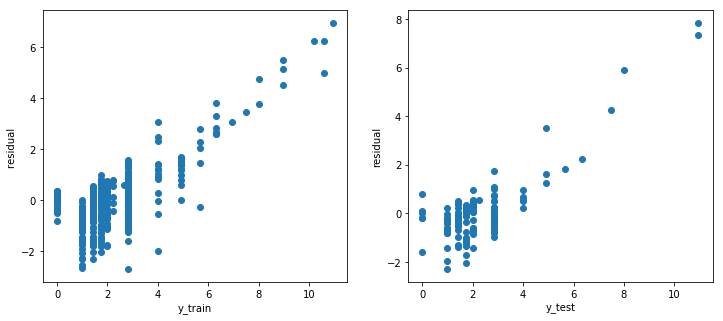

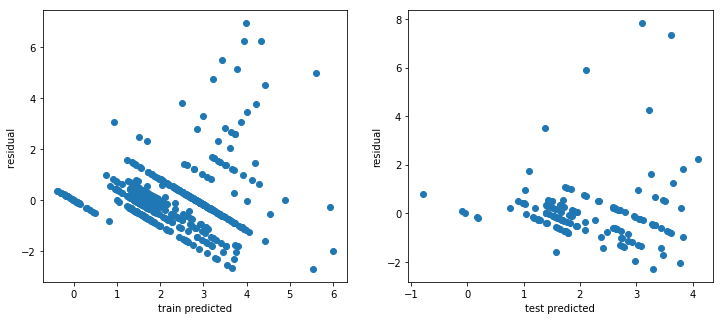

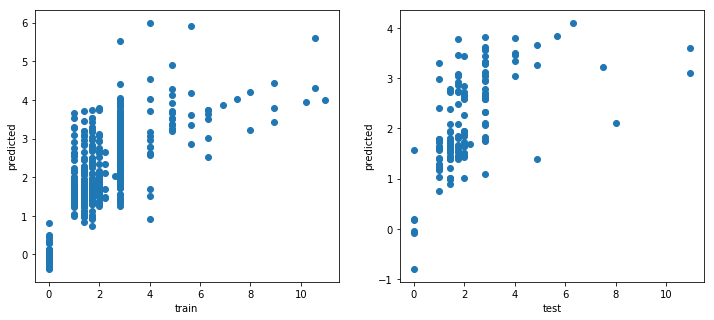

In [68]:
## Linear Regression with transformed response - Absentee_hrs_sqrt

target = absentee_data['Absentee_hrs_sqrt']

perform_reg(Ln,predictors , target)

In [69]:
## Cross validate and check the performance . 

kf = KFold(n_splits = 5, shuffle = True , random_state = 3)
scores = cross_val_score(Ln, predictors , target , cv = kf )
print(" 5 fold cross validation scores : {}".format(scores))
print("Mean score with 5 fold cross validation :{}".format(np.mean(cross_val_score(Ln, predictors , target , cv = kf ))))

 5 fold cross validation scores : [ 0.38435932  0.39249823  0.19081577  0.3239091   0.33703551]
Mean score with 5 fold cross validation :0.32572358669879975


X train size: (592, 69)
X test size: (148, 69)
y train size: (592,)
y test size: (148,)

train rmse: 0.19997580486499678
test rmse: 0.2547598320087317
train R2 : 0.7811840742609435
test  R2 : 0.5754172529913543


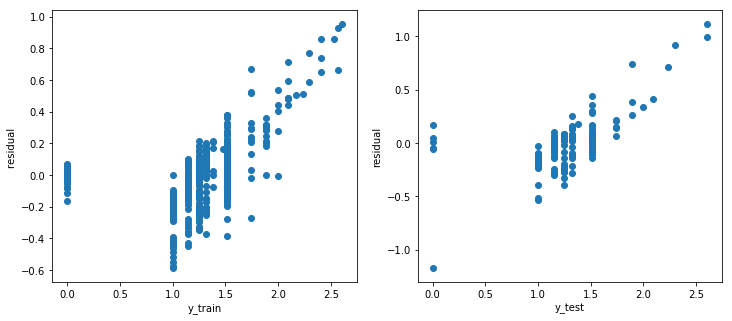

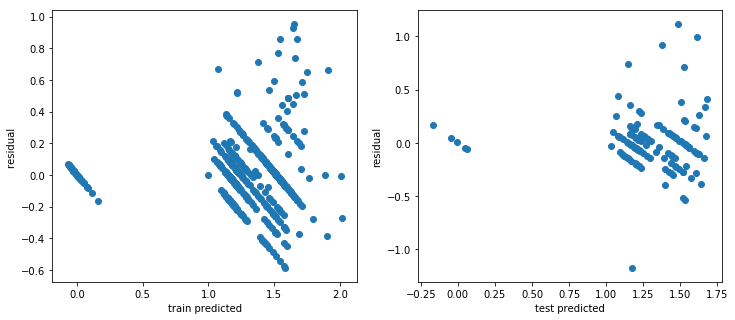

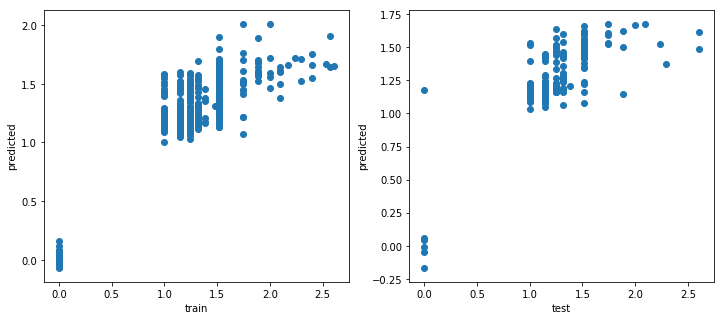

In [70]:
## Linear Regression with transformed response  - 5th root 

target = absentee_data['Absentee_hrs_5thR']
perform_reg(Ln,predictors , target)

In [71]:
## Cross validate and check the performance . 

kf = KFold(n_splits = 5, shuffle = True , random_state = 3)
scores = cross_val_score(Ln, predictors , target , cv = kf )
print(" 5 fold cross validation scores : {}".format(scores))
print("Mean score with 5 fold cross validation :{}".format(np.mean(cross_val_score(Ln, predictors , target , cv = kf ))))

 5 fold cross validation scores : [ 0.7445518   0.76327754  0.56215162  0.66771084  0.69494041]
Mean score with 5 fold cross validation :0.6865264430010478


Its seen that Linear Regression performs better with transformed response . Best test set performance is with 5th root transformation . How ever , the model can not predict higher absentee_hours correctly .

In [72]:
## Check the p values of the predictors , Adjusted R2 .

import statsmodels.api as sm

model = sm.OLS(target,predictors)
results = model.fit()
print(results.summary())

C:\Users\Anusha\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


                            OLS Regression Results                            
Dep. Variable:      Absentee_hrs_5thR   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     33.71
Date:                Tue, 16 Jul 2019   Prob (F-statistic):          3.82e-166
Time:                        15:56:10   Log-Likelihood:                 106.99
No. Observations:                 740   AIC:                            -89.99
Df Residuals:                     678   BIC:                             195.6
Df Model:                          61                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Height                     0

The p values of the variables show that many categorical variables such as Reason codes 0, 9,10,13,19,23,25, 27, 28 , Day_3, Education_1, Season_3 show significance. However variables like Height , Age etc do not show significance.This shows an over reliance on Reason code . This may not be a good model .

X train size: (592, 41)
X test size: (148, 41)
y train size: (592,)
y test size: (148,)

train rmse: 0.2602393302398245
test rmse: 0.3128201369012068
train R2 : 0.6294303172667699
test  R2 : 0.35983807734380235


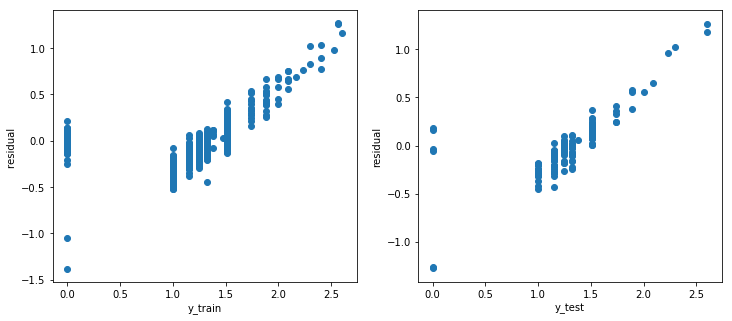

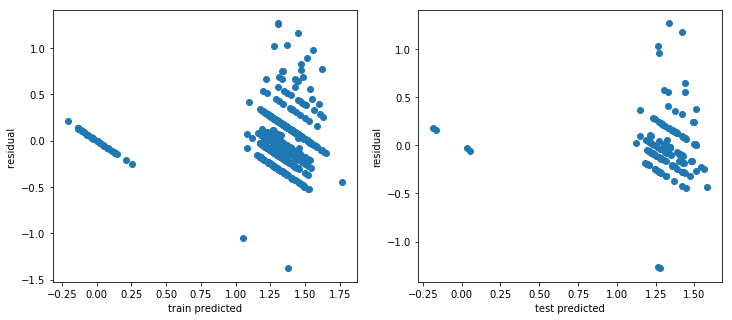

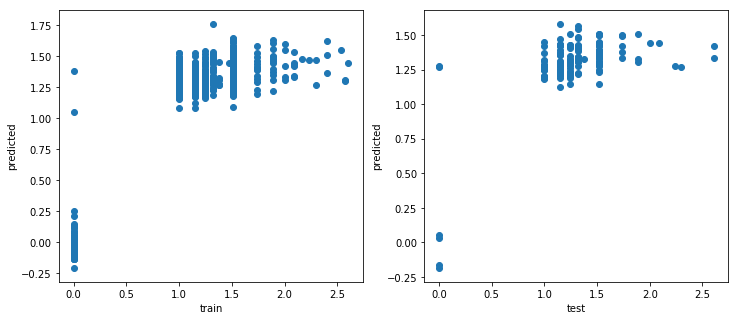

In [73]:
## Linear Regression w/o Reason and transformed response .
## hot encode the categorical variables.
cat_var = ['Day','Son','Social_drinker', 'Disp_failure','Hit_target','Seasons', 'Education']
correlated_var = ['Day','Son','Social_drinker', 'Height', 'Residence_to_work_dist','Age','Disp_failure', 'Transport_expense','Age_Bmi','Sick_children','Hit_target','Seasons','Education']

predictors = absentee_data[correlated_var]
predictors = hot_encode(predictors, cat_var)

target = absentee_data['Absentee_hrs_5thR']
perform_reg(Ln,predictors , target)

The R2 value decreases w/o 'Reason' code as a predictor variable.

X train size: (592, 23)
X test size: (148, 23)
y train size: (592,)
y test size: (148,)

train rmse: 0.414682479564766
test rmse: 0.38467690716984826
train R2 : 0.059074163168037375
test  R2 : 0.031961419521083445


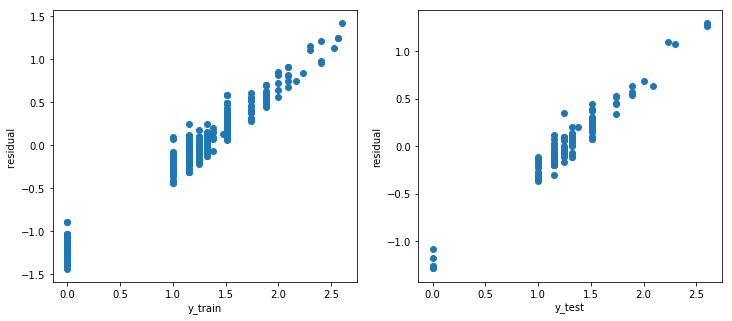

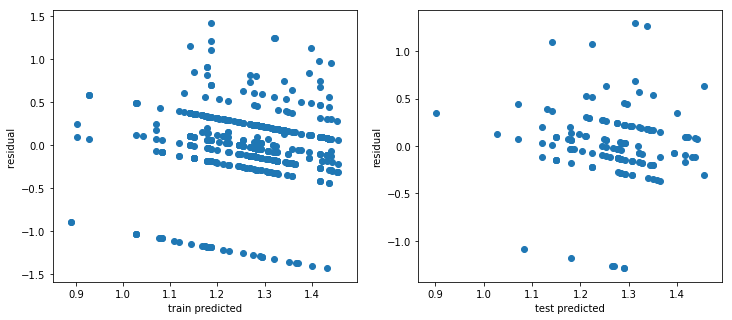

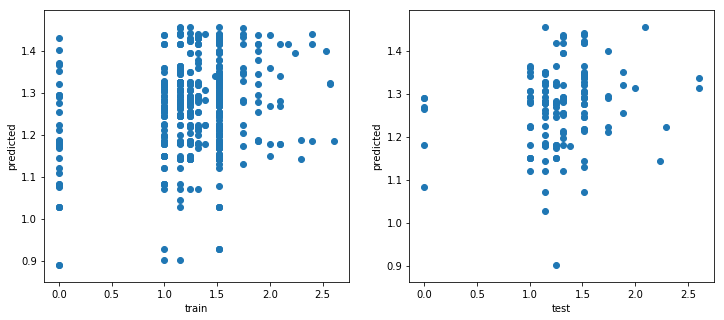

In [74]:
## Reduce the predictor variables further .

cat_var = ['Son','Social_drinker', 'Seasons', 'Education', 'Social_smoker']
correlated_var = ['Son','Social_drinker', 'Height', 'Residence_to_work_dist','Age','Transport_expense','Age_Bmi','Sick_children','Seasons','Education','Social_smoker']

predictors = absentee_data[correlated_var]
predictors = hot_encode(predictors, cat_var)

target = absentee_data['Absentee_hrs_5thR']
perform_reg(Ln,predictors , target)

X train size: (592, 6)
X test size: (148, 6)
y train size: (592,)
y test size: (148,)

train rmse: 0.42236629276619775
test rmse: 0.39212912417746965
train R2 : 0.023881544584875347
test  R2 : -0.005908860534717508


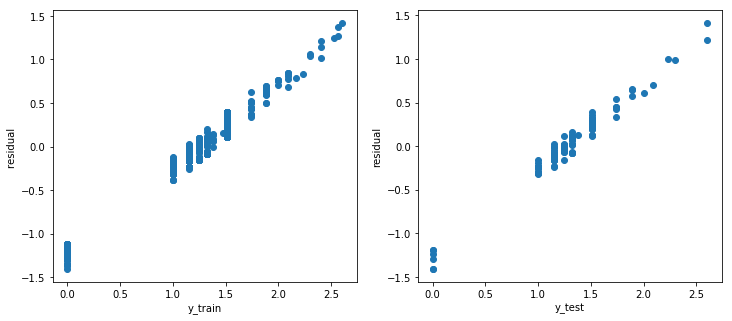

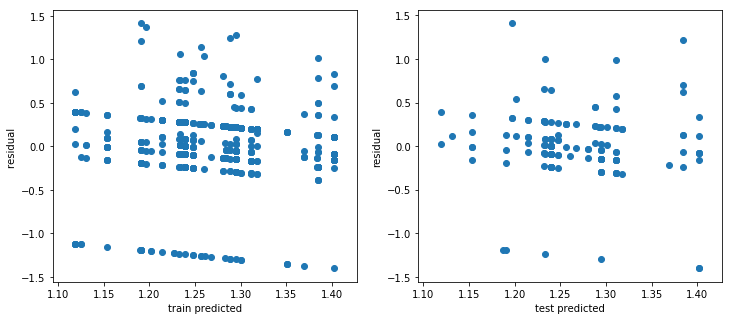

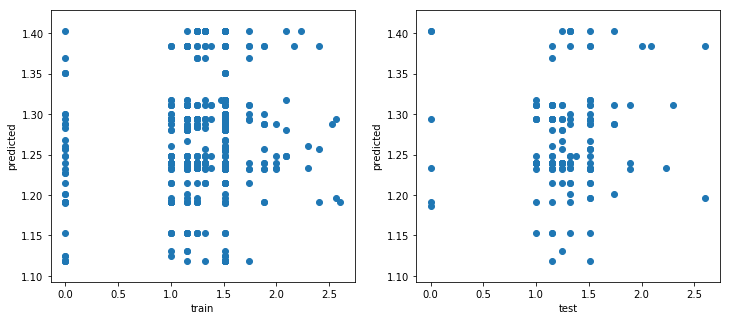

In [75]:
## Linear Regression with only the continuous variables.
correlated_var = ['Height', 'Residence_to_work_dist','Age','Transport_expense','Age_Bmi','Sick_children']

predictors = absentee_data[correlated_var]

target = absentee_data['Absentee_hrs_5thR']
perform_reg(Ln,predictors , target)

It's seen that the performance of Linear Regression reduces further with a higher value of train and test RMSE . 
Hence we will go with the first model that includes the categorical variables that were dropped in the previous two models.

Lasso Regression 

In [76]:
## hot encode the categorical variables.
cat_var = ['Reason','Day','Son','Social_drinker', 'Disp_failure','Hit_target','Seasons', 'Education','Social_smoker']
correlated_var = ['Reason','Day','Son','Social_drinker', 'Height', 'Residence_to_work_dist','Age','Disp_failure', 'Transport_expense','Age_Bmi','Sick_children','Hit_target','Seasons','Education','Social_smoker']

X train size: (592, 71)
X test size: (148, 71)
y train size: (592,)
y test size: (148,)

train rmse: 10.60543640923017
test rmse: 14.55781997929027
train R2 : 0.2972207448602261
test  R2 : 0.1421260166302556
X train size: (592, 71)
X test size: (148, 71)
y train size: (592,)
y test size: (148,)

train rmse: 10.620396264373545
test rmse: 14.62156093387952
train R2 : 0.29523668866164354
test  R2 : 0.13459722210509117
X train size: (592, 71)
X test size: (148, 71)
y train size: (592,)
y test size: (148,)

train rmse: 10.924679058824251
test rmse: 14.639170100326792
train R2 : 0.2542741128976481
test  R2 : 0.1325115079977044
X train size: (592, 71)
X test size: (148, 71)
y train size: (592,)
y test size: (148,)

train rmse: 11.394908364895336
test rmse: 14.729559471950811
train R2 : 0.18869618356145856
test  R2 : 0.1217658420488501
X train size: (592, 71)
X test size: (148, 71)
y train size: (592,)
y test size: (148,)

train rmse: 12.15372830042544
test rmse: 15.11790754173286
train R2 : 0

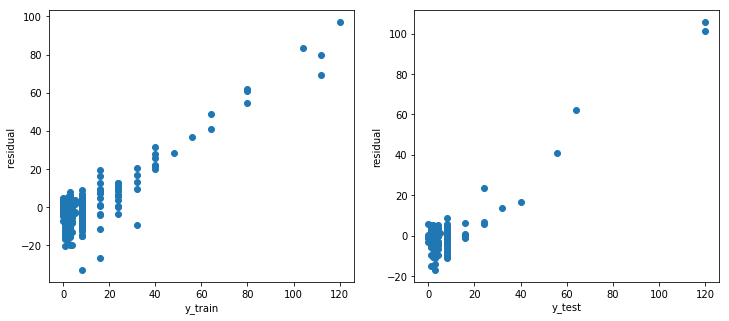

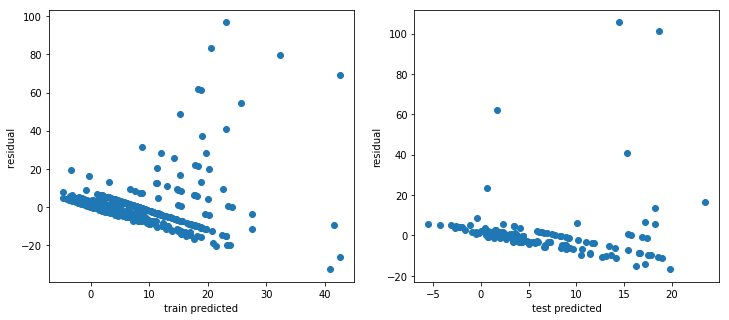

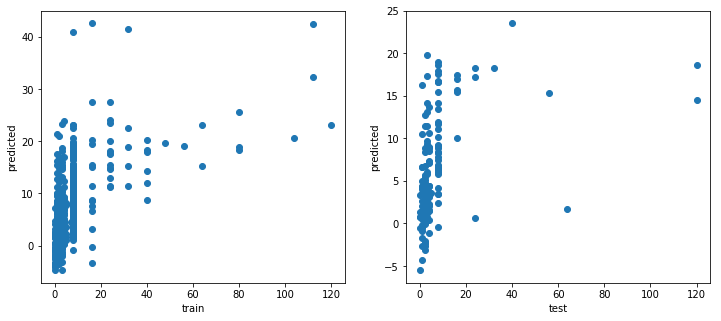

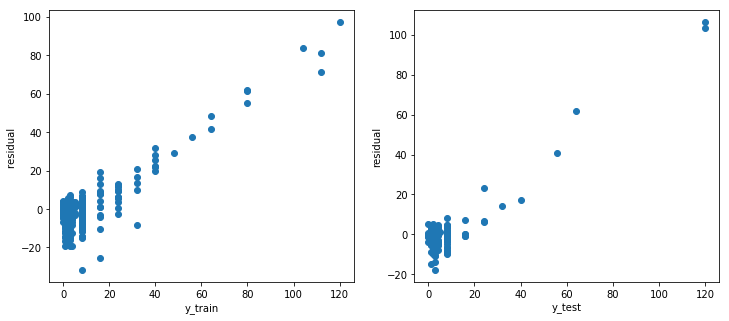

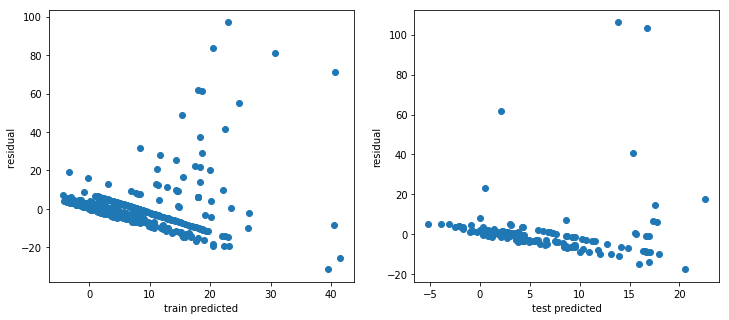

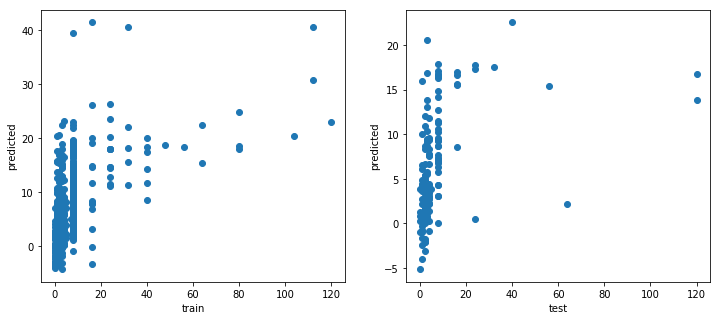

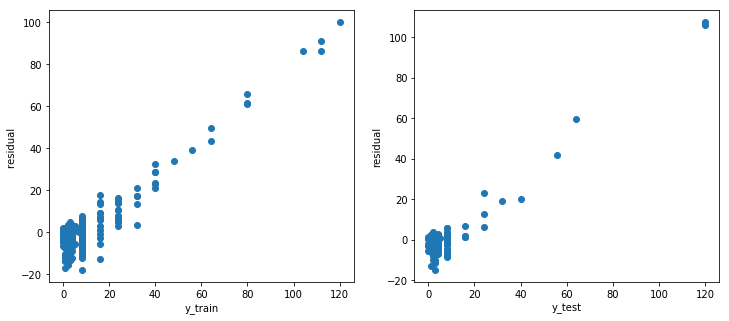

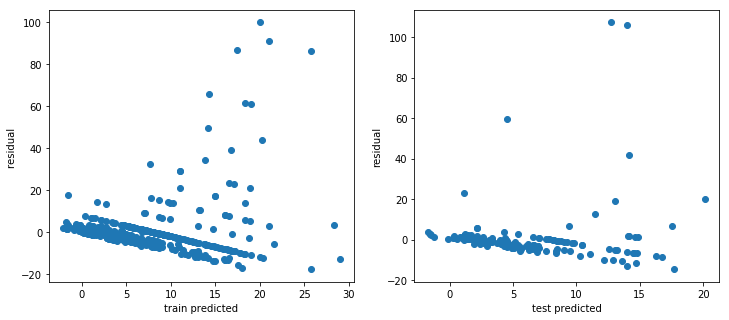

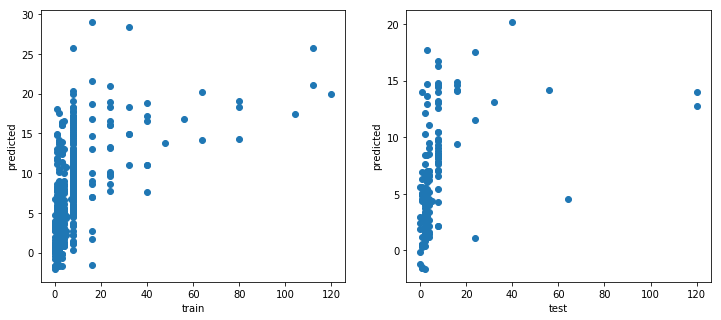

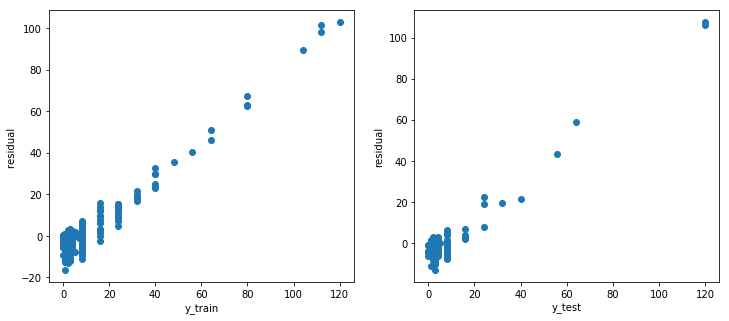

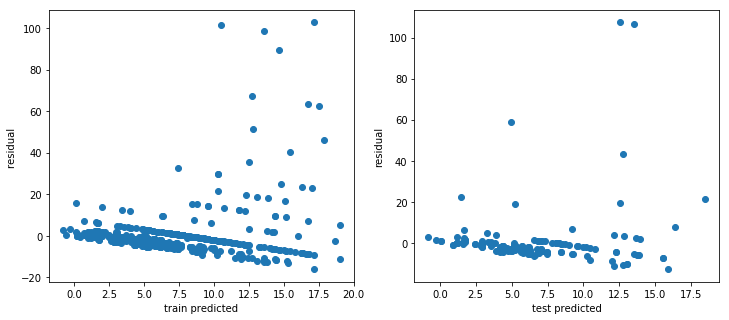

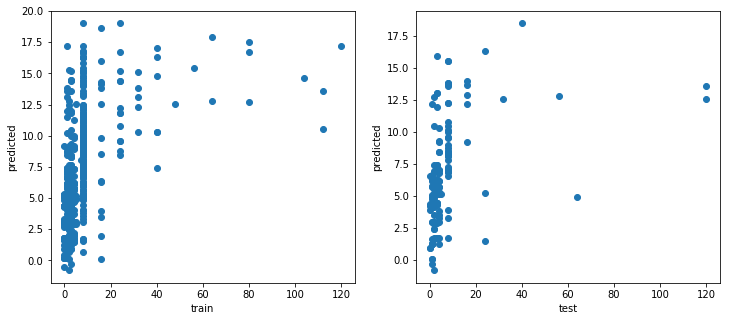

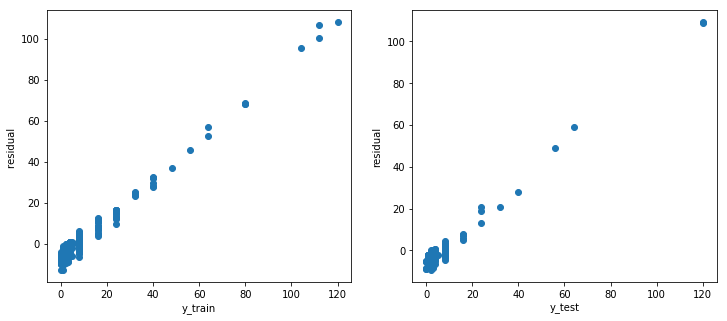

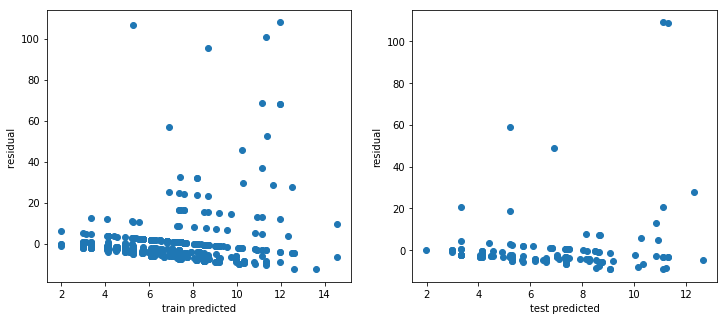

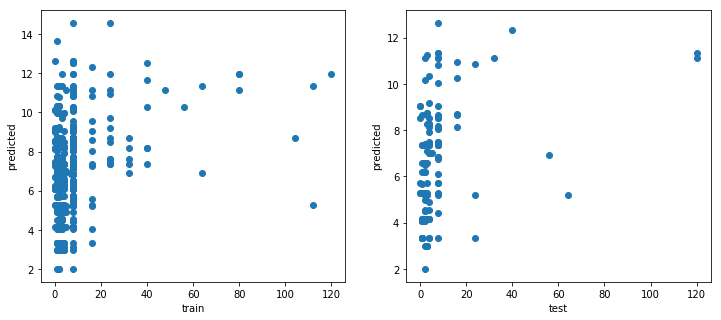

In [77]:
predictors = absentee_data[correlated_var]
predictors = hot_encode(predictors, cat_var)

target = absentee_data['Absentee_hours']

alpha = [0.001, 0.01,0.1, 0.2,0.5]

for a in alpha:
    Ls = Lasso(alpha = a)
    perform_reg(Ls,predictors, target)

Performance of Lasso with alpha = 0.01 is better than the other value of alphas . Hence alpha = 0.01 will be set for the remaining Lasso regression.

X train size: (592, 71)
X test size: (148, 71)
y train size: (592,)
y test size: (148,)

train rmse: 1.093821589330521
test rmse: 1.332657683259154
train R2 : 0.44908353634800213
test  R2 : 0.30473310914731866


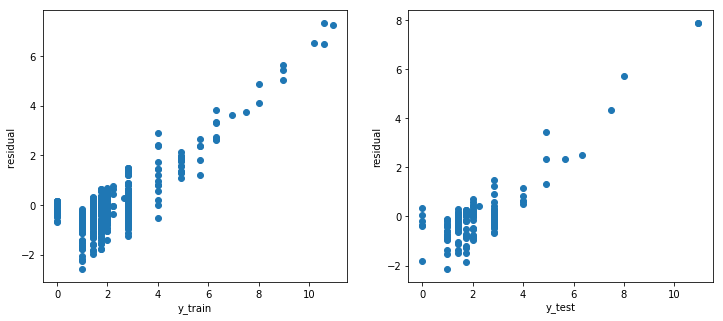

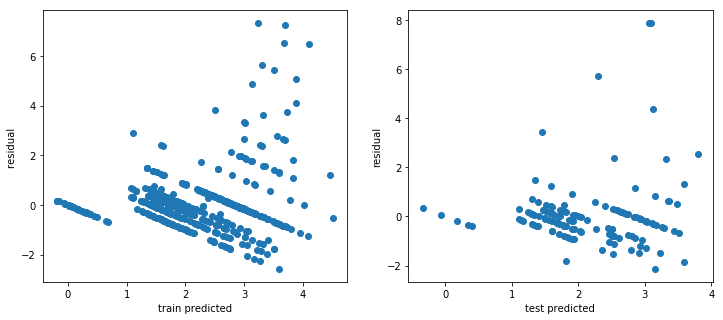

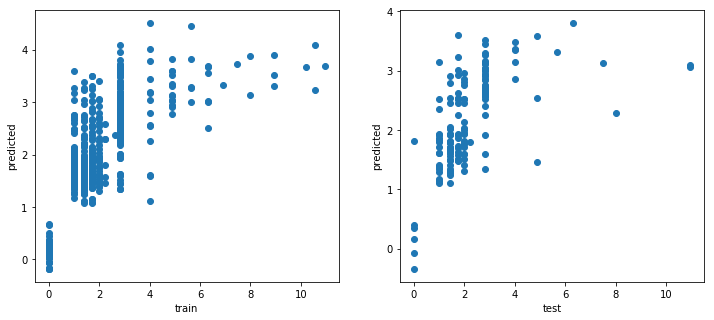

In [78]:
## Lasso Regression performance of transformed response - square root

target = absentee_data['Absentee_hrs_sqrt']

Ls = Lasso(alpha = 0.01)
perform_reg(Ls, predictors, target)

X train size: (592, 71)
X test size: (148, 71)
y train size: (592,)
y test size: (148,)

train rmse: 0.23634362896908317
test rmse: 0.27696967405054956
train R2 : 0.6943588536431089
test  R2 : 0.49816046198563624


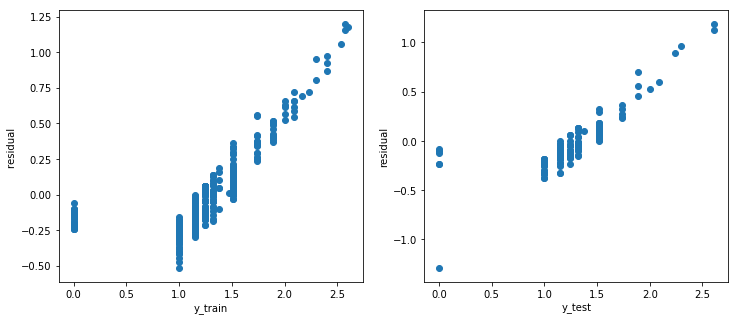

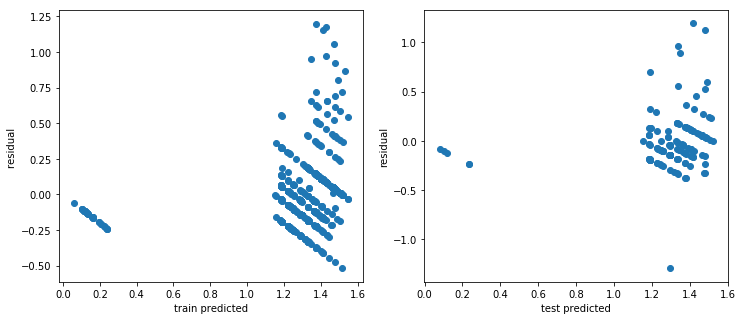

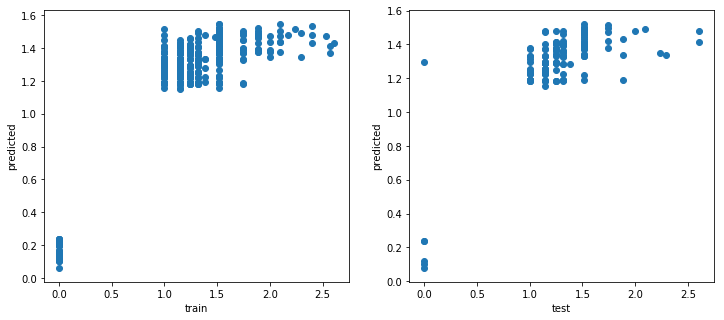

In [79]:
## Lasso Regression performance of transformed response - fifth root

target = absentee_data['Absentee_hrs_5thR']

Ls = Lasso(alpha = 0.01)
perform_reg(Ls, predictors, target)

In [80]:
## Cross validate and check the performance . 
Ls = Lasso(alpha = 0.01)
kf = KFold(n_splits = 5, shuffle = True , random_state = 3)
scores = cross_val_score(Ls, predictors , target , cv = kf )
print(" 5 fold cross validation scores : {}".format(scores))
print("Mean score with 5 fold cross validation :{}".format(np.mean(cross_val_score(Ls, predictors , target , cv = kf ))))

 5 fold cross validation scores : [ 0.72471784  0.73424276  0.56563352  0.54030087  0.6496244 ]
Mean score with 5 fold cross validation :0.6429038783732297


As shown above Lasso does not outperform Linear Regression on test data with the 5th root transformed response..

In [81]:
## Define function that fits the given model to train and test data and calculates RMSE and R2
def fit_model(model, X_train, X_test, y_train, y_test):
    
    model.fit(X_train, y_train)
    train_pred = model.predict(X_train)
    train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))

    test_pred = model.predict(X_test)
    test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))

    print("\ntrain rmse: {}".format(train_rmse))
    print("test rmse: {}".format(test_rmse))

    print("train R2 : {}".format(r2_score(y_train,train_pred)))
    print("test  R2 : {}".format(r2_score(y_test, test_pred)))
    
    return train_rmse , test_rmse 

In [93]:
## Check the performance of decision trees with selected variables

target = absentee_data['Absentee_hours']
predictors = absentee_data.drop(['Absentee_days','Residence_to_work_dist','Transport_expense','Social_smoker','ID','Reason','Absentee_hours','Absentee_hrs_sqrt','Absentee_hrs_5thR','Sick_children','Age_Bmi','Hit_target','Pet','Seasons','Education'] , axis = 1)

cat_var = ['Son','Social_drinker','Month','Day','Disp_failure']
predictors = hot_encode(predictors, cat_var)

X_train,X_test,y_train,y_test = train_test_split(predictors , target , random_state = 1 , test_size = 0.2)
print("X train size: {}".format(X_train.shape))
print("X test size: {}".format(X_test.shape))
print("y train size: {}".format(y_train.shape))
print("y test size: {}".format(y_test.shape))

X train size: (592, 33)
X test size: (148, 33)
y train size: (592,)
y test size: (148,)


In [94]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 592 entries, 654 to 37
Data columns (total 33 columns):
Service_time        592 non-null int64
Age                 592 non-null int64
Work_load_avg       592 non-null float64
Weight              592 non-null int64
Height              592 non-null int64
Bmi                 592 non-null int64
Son_0               592 non-null uint8
Son_1               592 non-null uint8
Son_2               592 non-null uint8
Son_3               592 non-null uint8
Son_4               592 non-null uint8
Social_drinker_0    592 non-null uint8
Social_drinker_1    592 non-null uint8
Month_0             592 non-null uint8
Month_1             592 non-null uint8
Month_2             592 non-null uint8
Month_3             592 non-null uint8
Month_4             592 non-null uint8
Month_5             592 non-null uint8
Month_6             592 non-null uint8
Month_7             592 non-null uint8
Month_8             592 non-null uint8
Month_9             592 non-null uint8


In [95]:
dt = DecisionTreeRegressor(random_state = 2)

fit_model(dt, X_train , X_test , y_train , y_test)


train rmse: 4.486764193483755
test rmse: 14.345963950940407
train R2 : 0.8742151501915094
test  R2 : 0.16691315187061395


(4.4867641934837552, 14.345963950940407)

In [96]:
print("Max depth : {}".format(dt.tree_.max_depth))

Max depth : 30


In [97]:
## Decision Trees Regression with transformed response .

target = absentee_data['Absentee_hrs_5thR']
predictors = absentee_data.drop(['Absentee_days','Residence_to_work_dist','Transport_expense','Social_smoker','ID','Absentee_hours','Absentee_hrs_sqrt','Absentee_hrs_5thR','Pet','Education'] , axis = 1)
cat_var = ['Son','Social_drinker','Day','Disp_failure','Seasons','Reason','Month']
predictors = hot_encode(predictors, cat_var)


X_train,X_test,y_train,y_test = train_test_split(predictors , target , random_state = 1 , test_size = 0.2)
print("X train size: {}".format(X_train.shape))
print("X test size: {}".format(X_test.shape))
print("y train size: {}".format(y_train.shape))
print("y test size: {}".format(y_test.shape))

X train size: (592, 68)
X test size: (148, 68)
y train size: (592,)
y test size: (148,)


In [98]:
dt = DecisionTreeRegressor(random_state = 2)

fit_model(dt, X_train , X_test , y_train , y_test)


train rmse: 0.04188111368584391
test rmse: 0.32527688559442364
train R2 : 0.9904024482160613
test  R2 : 0.30783945279952907


(0.041881113685843907, 0.32527688559442364)

X_train size : (503, 68)
y_train size : (503,)
X_validate size : (126, 68)
y_validate size : (126,)
X_test size : (111, 68)
y_test size : (111,)

train rmse: 0.206576535158844
test rmse: 0.23985427091523934
train R2 : 0.7311175784432145
test  R2 : 0.7732403796909462

train rmse: 0.18163051555128695
test rmse: 0.23977495891434417
train R2 : 0.7921365819905992
test  R2 : 0.7733903189490887

train rmse: 0.1549424309056726
test rmse: 0.28527378556811017
train R2 : 0.8487340553983223
test  R2 : 0.6792294125608176

train rmse: 0.12586718270668618
test rmse: 0.29184078824161125
train R2 : 0.9001781864225479
test  R2 : 0.6642911515386687

train rmse: 0.08181920715971418
test rmse: 0.2737266716829438
train R2 : 0.9578195735106159
test  R2 : 0.7046717156101958

train rmse: 0.04718239936816343
test rmse: 0.3188925280509782
train R2 : 0.9859731395083147
test  R2 : 0.5991706671055271

train rmse: 0.03883658867606792
test rmse: 0.29561964592083095
train R2 : 0.9904965217786487
test  R2 : 0.655541112

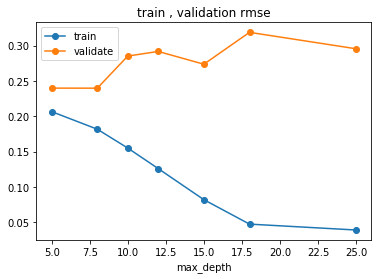

Least rmse:0.240 depth :8


In [99]:
## Parameter Selection 

X_trainval,X_test , y_trainval,y_test = train_test_split(predictors,target , random_state = 1, test_size = 0.15, shuffle = True)
X_train,X_validate , y_train,y_validate = train_test_split(X_trainval,y_trainval , random_state = 0, test_size = 0.2, shuffle = True)

print("X_train size : {}".format(X_train.shape))
print("y_train size : {}".format(y_train.shape))

print("X_validate size : {}".format(X_validate.shape))
print("y_validate size : {}".format(y_validate.shape))

print("X_test size : {}".format(X_test.shape))
print("y_test size : {}".format(y_test.shape))

depth = [5, 8, 10, 12, 15,18, 25]
train_rmse = {}
validation_rmse = {}

for d in depth:
    dt = DecisionTreeRegressor(random_state = 1, max_depth = d)
    train_rmse[d], validation_rmse[d] = fit_model(dt, X_train, X_validate , y_train , y_validate )
    
plt.plot(depth , train_rmse.values(), 'o-', label = 'train')
plt.plot(depth , validation_rmse.values(), 'o-', label = 'validate')
plt.legend()
plt.title("train , validation rmse")
plt.xlabel("max_depth")
plt.show()

best_depth = min(validation_rmse , key = validation_rmse.get)
print("Least rmse:{:.3f}".format(validation_rmse[best_depth]) + " " + "depth :{}".format(best_depth))


Test rmse: 0.277
Test set score :0.540


Text(0,0.5,'residual')

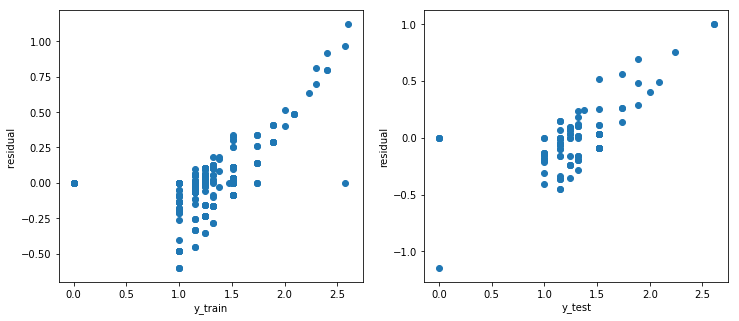

In [100]:
## With depth = 8 , check the RMSE for test data . 

dt = DecisionTreeRegressor(random_state = 1, max_depth = 8)
dt.fit(X_train, y_train)
train_pred = dt.predict(X_train)
test_pred = dt.predict(X_test)
ft_imp = dt.feature_importances_.tolist()

print("Test rmse: {:.3f}".format(np.sqrt(mean_squared_error(y_test,test_pred))))
print("Test set score :{:.3f}".format(dt.score(X_test,y_test)))

## Check for any pattern in the Residual Vs Response plot 

train_resid = y_train - train_pred
test_resid = y_test - test_pred

plt.figure(figsize = (12,5))
plt.subplot(121)
plt.scatter(y_train , train_resid)
plt.xlabel("y_train")
plt.ylabel("residual ")

plt.subplot(122)
plt.scatter(y_test , test_resid)
plt.xlabel('y_test')
plt.ylabel("residual")


In [101]:
## Cross validate and check the performance  

dt = DecisionTreeRegressor(random_state = 1, max_depth =5)
kf = KFold(n_splits = 5 , shuffle = True , random_state = 3)
scores = cross_val_score(dt, predictors , target , cv = kf )
print(" 5 fold cross validation scores : {}".format(scores))

print("Mean score with 5 fold cross validation :{}".format(np.mean(cross_val_score(dt, predictors , target , cv = kf ))))

 5 fold cross validation scores : [ 0.76423839  0.77702923  0.46640838  0.61740063  0.66342323]
Mean score with 5 fold cross validation :0.6576999720388639


Decision Tree Regression gives a R2 of 0.65 with 5 fold cross validation .

['Service_time', 'Age', 'Work_load_avg', 'Hit_target', 'Weight', 'Height', 'Bmi', 'Age_Bmi', 'Son_0', 'Son_3', 'Day_2', 'Day_6', 'Reason_0', 'Reason_9', 'Reason_13', 'Reason_23', 'Reason_25', 'Reason_27', 'Reason_28', 'Month_3', 'Month_4']
[0.0029, 0.0035, 0.0156, 0.0039, 0.0036, 0.0014, 0.0114, 0.0212, 0.0011, 0.0014, 0.0023, 0.0035, 0.713, 0.0131, 0.0048, 0.0457, 0.0194, 0.0669, 0.0583, 0.003, 0.0021]


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
 <a list of 21 Text xticklabel objects>)

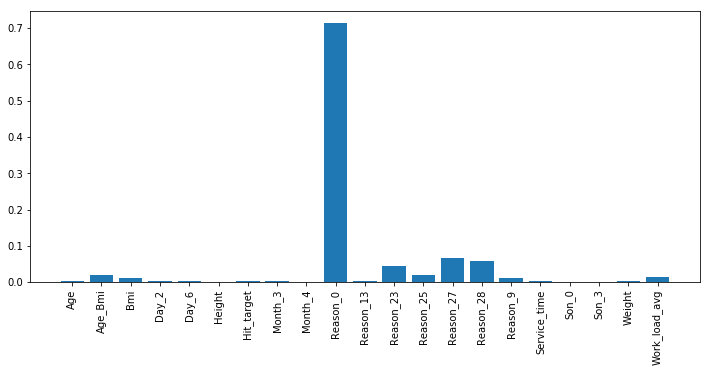

In [102]:
##  Select the features based on feature_importance

cols = predictors.columns.tolist()
ft_list_selected = []
ft_imp_selected = []

for i in range(len(cols)):
    if ft_imp[i] >= 0.001:
        ft_list_selected.append(cols[i])
        ft_imp_selected.append(round(ft_imp[i],4))
        
print(ft_list_selected)
print(ft_imp_selected)

plt.figure(figsize = (12,5))
plt.bar(ft_list_selected, ft_imp_selected)
plt.xticks(rotation = 90)

Decision Trees Regression shows the importance of Reason Code followed by Age_Bmi and Work_load_avg . Reason 0 being the most important is not a worthy case and Decision Trees need to be revisited by creating more  features based on Reason Code and omitting it eventually.

In [113]:
## Decision Trees with all the variables . 

absentee_data = absentee_data[absentee_data['Month'] > 0]

target = absentee_data['Absentee_hrs_5thR']
predictors = absentee_data.drop(['ID','Absentee_days','Absentee_hours','Absentee_hrs_sqrt','Absentee_hrs_5thR'] , axis = 1)
cat_var = ['Reason','Son','Social_drinker','Month','Education','Disp_failure','Social_smoker','Hit_target','Pet','Day','Seasons']
predictors = hot_encode(predictors, cat_var)


X_train,X_test,y_train,y_test = train_test_split(predictors , target , random_state = 1 , test_size = 0.2)
print("X train size: {}".format(X_train.shape))
print("X test size: {}".format(X_test.shape))
print("y train size: {}".format(y_train.shape))
print("y test size: {}".format(y_test.shape))

X train size: (589, 93)
X test size: (148, 93)
y train size: (589,)
y test size: (148,)


In [114]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 589 entries, 667 to 37
Data columns (total 93 columns):
Transport_expense         589 non-null int64
Residence_to_work_dist    589 non-null int64
Service_time              589 non-null int64
Age                       589 non-null int64
Work_load_avg             589 non-null float64
Weight                    589 non-null int64
Height                    589 non-null int64
Bmi                       589 non-null int64
Sick_children             589 non-null int64
Age_Bmi                   589 non-null int64
Reason_0                  589 non-null uint8
Reason_1                  589 non-null uint8
Reason_2                  589 non-null uint8
Reason_3                  589 non-null uint8
Reason_4                  589 non-null uint8
Reason_5                  589 non-null uint8
Reason_6                  589 non-null uint8
Reason_7                  589 non-null uint8
Reason_8                  589 non-null uint8
Reason_9                  589 non-null uin

In [115]:
dt = DecisionTreeRegressor(random_state = 2)

fit_model(dt, X_train , X_test , y_train , y_test)


train rmse: 0.04261840151182092
test rmse: 0.30481578566016576
train R2 : 0.9902206676066485
test  R2 : 0.17130876598877176


(0.042618401511820919, 0.30481578566016576)

In [116]:
print("Max depth : {}".format(dt.tree_.max_depth))

Max depth : 22


X_train size : (500, 93)
y_train size : (500,)
X_validate size : (126, 93)
y_validate size : (126,)
X_test size : (111, 93)
y_test size : (111,)

train rmse: 0.23660165093725238
test rmse: 0.1589917703318092
train R2 : 0.6931043110962658
test  R2 : 0.8531835921403286

train rmse: 0.18495668059925902
test rmse: 0.21392777997699827
train R2 : 0.8124594041433149
test  R2 : 0.7341971260124689

train rmse: 0.14099458078903018
test rmse: 0.24142918189473592
train R2 : 0.8910166665099115
test  R2 : 0.6614640227637193

train rmse: 0.1028491482956745
test rmse: 0.27582807819878785
train R2 : 0.9420095277325894
test  R2 : 0.5581221310592968

train rmse: 0.06855188401700194
test rmse: 0.2770672763414367
train R2 : 0.9742371421961389
test  R2 : 0.5541428098322587

train rmse: 0.05061734971375449
test rmse: 0.27876329116542636
train R2 : 0.9859539551582642
test  R2 : 0.5486676427794016

train rmse: 0.02858153617363126
test rmse: 0.2813270876941756
train R2 : 0.9955215639130025
test  R2 : 0.54032762

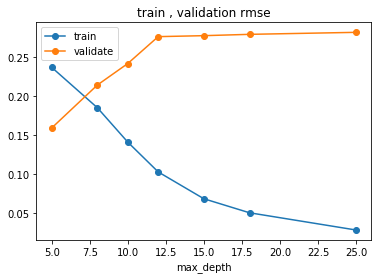

Least rmse:0.159 depth :5


In [117]:
## Parameter Selection 

X_trainval,X_test , y_trainval,y_test = train_test_split(predictors,target , random_state = 1, test_size = 0.15)
X_train,X_validate , y_train,y_validate = train_test_split(X_trainval,y_trainval , random_state = 0, test_size = 0.2)

print("X_train size : {}".format(X_train.shape))
print("y_train size : {}".format(y_train.shape))

print("X_validate size : {}".format(X_validate.shape))
print("y_validate size : {}".format(y_validate.shape))

print("X_test size : {}".format(X_test.shape))
print("y_test size : {}".format(y_test.shape))

depth = [5, 8, 10, 12, 15,18, 25]
train_rmse = {}
validation_rmse = {}

for d in depth:
    dt = DecisionTreeRegressor(random_state = 1, max_depth = d)
    train_rmse[d], validation_rmse[d] = fit_model(dt, X_train, X_validate , y_train , y_validate )
    
plt.plot(depth , train_rmse.values(), 'o-', label = 'train')
plt.plot(depth , validation_rmse.values(), 'o-', label = 'validate')
plt.legend()
plt.title("train , validation rmse")
plt.xlabel("max_depth")
plt.show()

best_depth = min(validation_rmse , key = validation_rmse.get)
print("Least rmse:{:.3f}".format(validation_rmse[best_depth]) + " " + "depth :{}".format(best_depth))


In [118]:
## Cross validate and check the performance  

dt = DecisionTreeRegressor(random_state = 1, max_depth = 5)
kf = KFold(n_splits = 5 , shuffle = True , random_state = 3)
scores = cross_val_score(dt, predictors , target , cv = kf )
print(" 5 fold cross validation scores : {}".format(scores))

print("Mean score with 5 fold cross validation :{}".format(np.mean(cross_val_score(dt, predictors , target , cv = kf ))))

 5 fold cross validation scores : [ 0.73165476  0.73116654  0.6593052   0.64474856  0.62788502]
Mean score with 5 fold cross validation :0.6789520194470183


['Reason_23', 'Reason_27', 'Reason_28', 'Social_drinker_0', 'Disp_failure_1']
[0.0546, 0.0614, 0.0521, 0.0307, 0.7817]


([0, 1, 2, 3, 4], <a list of 5 Text xticklabel objects>)

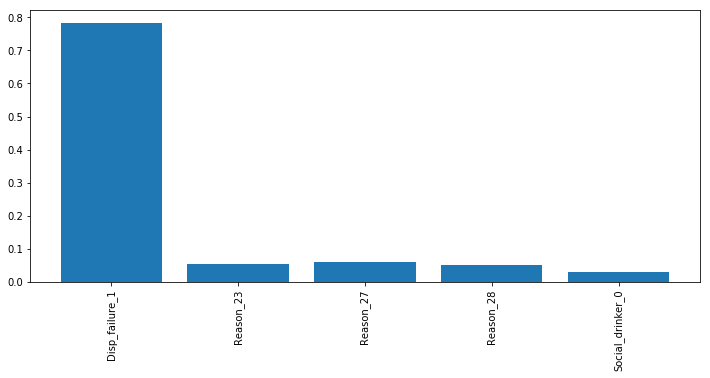

In [119]:
##  Select the features based on feature_importance
cols = predictors.columns.tolist()
ft_list_selected = []
ft_imp_selected = []

for i in range(len(cols)):
    if ft_imp[i] >= 0.005:
        ft_list_selected.append(cols[i])
        ft_imp_selected.append(round(ft_imp[i],4))
        
print(ft_list_selected)
print(ft_imp_selected)

plt.figure(figsize = (12,5))
plt.bar(ft_list_selected, ft_imp_selected)
plt.xticks(rotation = 90)

Its observed that Decision Trees Regression for transformed response performs better in prediction and captures 67% of the variation . The performance of Decision Trees on original response is poor for test data . How ever , the feature importance emphasizes on Reason Code (especially 0 )and if Reason Code is dropped in the model , decision trees regression performance decreases.

RandomForestRegressor:

In [120]:
## Check the performance of randomforestregressor . 

target = absentee_data['Absentee_hours']
predictors = absentee_data.drop(['ID','Absentee_days','Absentee_hours','Absentee_hrs_sqrt','Absentee_hrs_5thR'] , axis = 1)
cat_var = ['Reason','Son','Social_drinker','Month','Education','Disp_failure','Social_smoker','Hit_target','Pet','Day','Seasons']
predictors = hot_encode(predictors, cat_var)

X_train,X_test,y_train,y_test = train_test_split(predictors , target , random_state = 1 , test_size = 0.2)
print("X train size: {}".format(X_train.shape))
print("X test size: {}".format(X_test.shape))
print("y train size: {}".format(y_train.shape))
print("y test size: {}".format(y_test.shape))

rf = RandomForestRegressor(random_state = 2)

fit_model(rf, X_train , X_test , y_train , y_test)

X train size: (589, 93)
X test size: (148, 93)
y train size: (589,)
y test size: (148,)

train rmse: 5.539896936298081
test rmse: 15.643826030950247
train R2 : 0.8432918880511701
test  R2 : -1.312603617036309


(5.5398969362980814, 15.643826030950247)

In [121]:
## Check the performance of randomforestregressor for the transformed response.

target = absentee_data['Absentee_hrs_5thR']
predictors = absentee_data.drop(['ID','Absentee_days','Absentee_hours','Absentee_hrs_sqrt','Absentee_hrs_5thR'] , axis = 1)
cat_var = ['Reason','Son','Social_drinker','Month','Education','Disp_failure','Social_smoker','Hit_target','Pet','Day','Seasons']
predictors = hot_encode(predictors, cat_var)

X_train,X_test,y_train,y_test = train_test_split(predictors , target , random_state = 1 , test_size = 0.2)

print("X train size: {}".format(X_train.shape))
print("X test size: {}".format(X_test.shape))
print("y train size: {}".format(y_train.shape))
print("y test size: {}".format(y_test.shape))

rf = RandomForestRegressor(random_state = 2)

fit_model(rf, X_train , X_test , y_train , y_test)

X train size: (589, 93)
X test size: (148, 93)
y train size: (589,)
y test size: (148,)

train rmse: 0.11024150858540256
test rmse: 0.25071370948686184
train R2 : 0.9345657408202569
test  R2 : 0.4393730105661424


(0.11024150858540256, 0.25071370948686184)

As shown above, Random Forest Regressor performs better on transformed response as compared to the original response variable.

X_train size : (500, 93)
y_train size : (500,)
X_validate size : (126, 93)
y_validate size : (126,)
X_test size : (111, 93)
y_test size : (111,)

train rmse: 0.19786355214327864
test rmse: 0.1688217750451449
train R2 : 0.7853717673771221
test  R2 : 0.8344678986245504

train rmse: 0.19935255246314165
test rmse: 0.16692957244868997
train R2 : 0.7821292905163876
test  R2 : 0.8381577655374192

train rmse: 0.19985118903688995
test rmse: 0.16895920868076825
train R2 : 0.7810380160865648
test  R2 : 0.8341982777362036

train rmse: 0.20049614249398598
test rmse: 0.16947589246224967
train R2 : 0.7796224812577672
test  R2 : 0.8331826710925105

train rmse: 0.20031175856174913
test rmse: 0.1705791173152233
train R2 : 0.780027630091574
test  R2 : 0.8310037649759356

train rmse: 0.2003040466556363
test rmse: 0.17080792429573108
train R2 : 0.7800445674258665
test  R2 : 0.8305500933627032


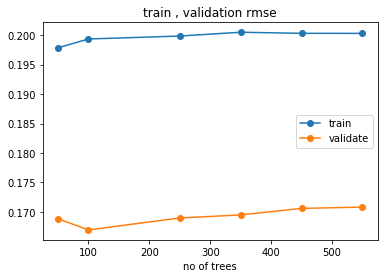

Least rmse:0.167 no of trees  :100


In [122]:
## Parameter Selection for Random Forest.

X_trainval,X_test , y_trainval,y_test = train_test_split(predictors,target , random_state = 1, test_size = 0.15)
X_train,X_validate , y_train,y_validate = train_test_split(X_trainval,y_trainval , random_state = 0, test_size = 0.2)

print("X_train size : {}".format(X_train.shape))
print("y_train size : {}".format(y_train.shape))

print("X_validate size : {}".format(X_validate.shape))
print("y_validate size : {}".format(y_validate.shape))

print("X_test size : {}".format(X_test.shape))
print("y_test size : {}".format(y_test.shape))

trees = [50,100,250,350,450,550]
train_rmse = {}
validation_rmse = {}

for t in trees:
    rf = RandomForestRegressor(random_state = 1, max_depth = 6, n_estimators = t)
    train_rmse[t], validation_rmse[t] = fit_model(rf, X_train, X_validate , y_train , y_validate )
    
plt.plot(trees , train_rmse.values(), 'o-', label = 'train')
plt.plot(trees , validation_rmse.values(), 'o-', label = 'validate')
plt.legend()
plt.title("train , validation rmse")
plt.xlabel("no of trees")
plt.show()

best_trees = min(validation_rmse , key = validation_rmse.get)
print("Least rmse:{:.3f}".format(validation_rmse[best_trees]) + " " + "no of trees  :{}".format(best_trees))


Test rmse: 0.241
Test set score :0.474


Text(0,0.5,'residual')

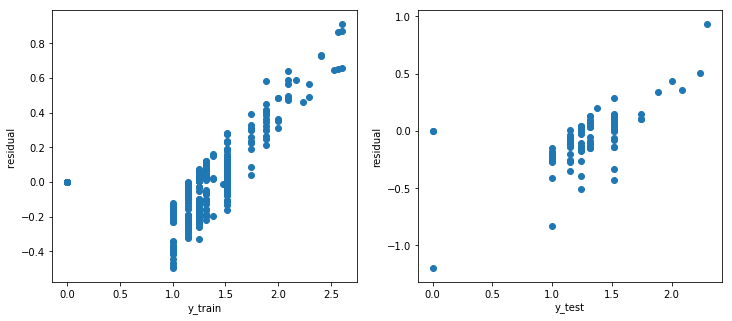

In [124]:
## With depth = 6 ,no of trees = 100 check the RMSE for test data . 

rf = RandomForestRegressor(random_state = 1, max_depth = 6 , n_estimators = 100)
rf.fit(X_train, y_train)
train_pred = rf.predict(X_train)
test_pred = rf.predict(X_test)
ft_imp = rf.feature_importances_.tolist()

print("Test rmse: {:.3f}".format(np.sqrt(mean_squared_error(y_test,test_pred))))
print("Test set score :{:.3f}".format(r2_score(y_test,test_pred)))

## Check for any pattern in the Residual Vs Response plot 

train_resid = y_train - train_pred
test_resid = y_test - test_pred

plt.figure(figsize = (12,5))
plt.subplot(121)
plt.scatter(y_train , train_resid)
plt.xlabel("y_train")
plt.ylabel("residual ")

plt.subplot(122)
plt.scatter(y_test , test_resid)
plt.xlabel('y_test')
plt.ylabel("residual")


In [125]:
## Cross validate and check the performance  

rf = RandomForestRegressor(random_state = 1, max_depth = 6 , n_estimators = 100)
kf = KFold(n_splits = 5 , shuffle = True , random_state = 3)
scores = cross_val_score(rf, predictors , target , cv = kf )
print(" 5 fold cross validation scores : {}".format(scores))

print("Mean score with 5 fold cross validation :{}".format(np.mean(cross_val_score(rf, predictors , target , cv = kf ))))

 5 fold cross validation scores : [ 0.72710086  0.75444103  0.66712442  0.68702729  0.64497861]
Mean score with 5 fold cross validation :0.6961344399305167


['Transport_expense', 'Age', 'Work_load_avg', 'Reason_0', 'Reason_9', 'Reason_13', 'Reason_19', 'Reason_23', 'Reason_27', 'Reason_28', 'Disp_failure_0', 'Disp_failure_1']
[0.0163, 0.019, 0.0103, 0.2454, 0.0101, 0.0101, 0.0258, 0.0408, 0.0256, 0.0369, 0.1993, 0.2422]


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 <a list of 12 Text xticklabel objects>)

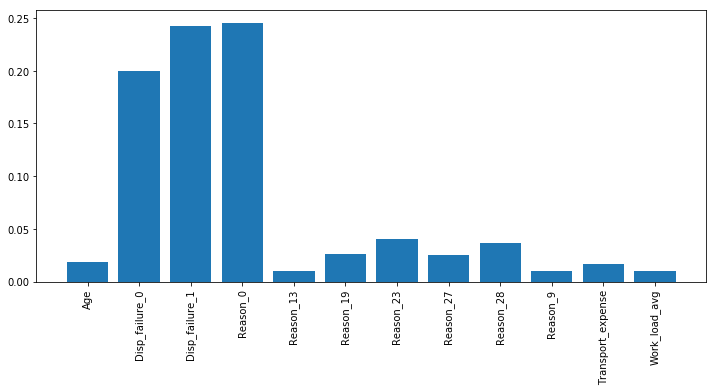

In [126]:
##  Select the features based on feature_importance

cols = predictors.columns.tolist()
ft_list_selected = []
ft_imp_selected = []

for i in range(len(cols)):
    if ft_imp[i] >= 0.01:
        ft_list_selected.append(cols[i])
        ft_imp_selected.append(round(ft_imp[i],4))
        
print(ft_list_selected)
print(ft_imp_selected)

plt.figure(figsize = (12,5))
plt.bar(ft_list_selected, ft_imp_selected)
plt.xticks(rotation = 90)

Slight improvement in test data prediction by Random Forest Regressor . But again we can see dependence on Reason Code in the model as compared to other variables.

GradientBoosting Regressor :

In [173]:
## Check the performance of GradientBoostingregressor . 

target = absentee_data['Absentee_hours']
predictors = absentee_data.drop(['ID','Absentee_days','Absentee_hours','Absentee_hrs_sqrt','Absentee_hrs_5thR'] , axis = 1)
cat_var = ['Reason','Son','Social_drinker','Month','Education','Disp_failure','Social_smoker','Hit_target','Pet','Day','Seasons']
predictors = hot_encode(predictors, cat_var)

#predictors = absentee_data.drop(['ID','Education','Disp_failure','Social_smoker','Service_time','Age','Work_load_avg','Bmi','Weight','Absentee_hours','Absentee_hrs_sqrt','Sick_children','Age_Bmi','Hit_target','Pet','Day','Seasons'] , axis = 1)
#cat_var = ['Reason','Son','Social_drinker','Month']
#predictors = hot_encode(predictors, cat_var)

X_train,X_test,y_train,y_test = train_test_split(predictors , target , random_state = 1 , test_size = 0.2)
print("X train size: {}".format(X_train.shape))
print("X test size: {}".format(X_test.shape))
print("y train size: {}".format(y_train.shape))
print("y test size: {}".format(y_test.shape))

gb = GradientBoostingRegressor(random_state = 2)

fit_model(gb, X_train , X_test , y_train , y_test)

X train size: (589, 93)
X test size: (148, 93)
y train size: (589,)
y test size: (148,)

train rmse: 7.073431851464728
test rmse: 14.760740584015073
train R2 : 0.7445249721791226
test  R2 : -1.0588823974320944


(7.0734318514647283, 14.760740584015073)

In [174]:
## Check the performance of GradientBoostingregressor with transformed response .

target = absentee_data['Absentee_hrs_5thR']
predictors = absentee_data.drop(['ID','Absentee_days','Absentee_hours','Absentee_hrs_sqrt','Absentee_hrs_5thR'] , axis = 1)
cat_var = ['Reason','Son','Social_drinker','Month','Education','Disp_failure','Social_smoker','Hit_target','Pet','Day','Seasons']
predictors = hot_encode(predictors, cat_var)

#predictors = absentee_data.drop(['ID','Education','Disp_failure','Social_smoker','Service_time','Age','Work_load_avg','Bmi','Weight','Absentee_hours','Absentee_hrs_sqrt','Sick_children','Age_Bmi','Hit_target','Pet','Day','Seasons'] , axis = 1)
#cat_var = ['Reason','Son','Social_drinker','Month']
#predictors = hot_encode(predictors, cat_var)

X_train,X_test,y_train,y_test = train_test_split(predictors , target , random_state = 1 , test_size = 0.2)
print("X train size: {}".format(X_train.shape))
print("X test size: {}".format(X_test.shape))
print("y train size: {}".format(y_train.shape))
print("y test size: {}".format(y_test.shape))

gb = GradientBoostingRegressor(random_state = 2)

fit_model(gb, X_train , X_test , y_train , y_test)

X train size: (589, 93)
X test size: (148, 93)
y train size: (589,)
y test size: (148,)

train rmse: 0.1640037512741401
test rmse: 0.2510985193267552
train R2 : 0.8551820290687961
test  R2 : 0.43765072466825794


(0.1640037512741401, 0.2510985193267552)

Again , GradientBoostingRegressor performs better on the Test data by regressing the transformed response.

X_train size : (500, 93)
y_train size : (500,)
X_validate size : (126, 93)
y_validate size : (126,)
X_test size : (111, 93)
y_test size : (111,)

train rmse: 0.147721697044502
test rmse: 0.19066493557115038
train R2 : 0.8803689752574835
test  R2 : 0.7888617265674541

train rmse: 0.11637295937225589
test rmse: 0.19310539537803242
train R2 : 0.9257563348081553
test  R2 : 0.783422109097684

train rmse: 0.09450234042003705
test rmse: 0.2002692980923394
train R2 : 0.9510401165922131
test  R2 : 0.7670546448557243

train rmse: 0.08299374550091122
test rmse: 0.204312235019666
train R2 : 0.9622387835965762
test  R2 : 0.7575545415996701

train rmse: 0.07006247449068949
test rmse: 0.2075559682916054
train R2 : 0.973089225936774
test  R2 : 0.749795131522083

train rmse: 0.04771701708748511
test rmse: 0.21736756096870022
train R2 : 0.9875174929397781
test  R2 : 0.7255806265998279


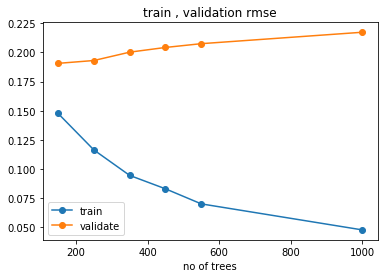

Least rmse:0.191 no of trees  :150


In [180]:
## Parameter Selection for Gradient Boosting 

X_trainval,X_test , y_trainval,y_test = train_test_split(predictors,target , random_state = 1, test_size = 0.15)
X_train,X_validate , y_train,y_validate = train_test_split(X_trainval,y_trainval , random_state = 0, test_size = 0.2)

print("X_train size : {}".format(X_train.shape))
print("y_train size : {}".format(y_train.shape))

print("X_validate size : {}".format(X_validate.shape))
print("y_validate size : {}".format(y_validate.shape))

print("X_test size : {}".format(X_test.shape))
print("y_test size : {}".format(y_test.shape))

trees = [150,250,350,450,550,1000]
train_rmse = {}
validation_rmse = {}

for t in trees:
    gb = GradientBoostingRegressor(random_state = 1, max_depth = 3, n_estimators = t)
    train_rmse[t], validation_rmse[t] = fit_model(gb, X_train, X_validate , y_train , y_validate )

    #train_pred = dt.predict(X_train)
    #valid_pred = dt.predict(X_validate)
    #train_rmse[d] =np.sqrt(mean_squared_error(y_train,train_pred))
    #validation_rmse[d] =np.sqrt(mean_squared_error(y_validate,valid_pred))

plt.plot(trees , train_rmse.values(), 'o-', label = 'train')
plt.plot(trees , validation_rmse.values(), 'o-', label = 'validate')
plt.legend()
plt.title("train , validation rmse")
plt.xlabel("no of trees")
plt.show()

best_trees = min(validation_rmse , key = validation_rmse.get)
print("Least rmse:{:.3f}".format(validation_rmse[best_trees]) + " " + "no of trees  :{}".format(best_trees))


In [179]:
## With depth = 3 ,no of trees = 150 check the RMSE for test data . 

gb = GradientBoostingRegressor(random_state = 1, max_depth = 3 , n_estimators = 150)
gb.fit(X_train, y_train)
train_pred = gb.predict(X_train)
test_pred = gb.predict(X_test)
ft_imp = gb.feature_importances_.tolist()

print("Test rmse: {:.3f}".format(np.sqrt(mean_squared_error(y_test,test_pred))))
print("Test set score :{:.3f}".format(r2_score(y_test,test_pred)))

Test rmse: 0.285
Test set score :0.265


In [181]:
## Cross validate and check the performance  

gb = GradientBoostingRegressor(random_state = 1, max_depth = 3 , n_estimators = 150)
kf = KFold(n_splits = 5 , shuffle = True , random_state = 3)
scores = cross_val_score(gb, predictors , target , cv = kf )
print(" 5 fold cross validation scores : {}".format(scores))

print("Mean score with 5 fold cross validation :{}".format(np.mean(cross_val_score(gb, predictors , target , cv = kf ))))

 5 fold cross validation scores : [ 0.62213122  0.74695771  0.6656649   0.70200883  0.65029102]
Mean score with 5 fold cross validation :0.6774107359734327


['Service_time', 'Age', 'Work_load_avg', 'Height', 'Reason_13', 'Disp_failure_0', 'Disp_failure_1']
[0.0333, 0.0611, 0.0376, 0.0365, 0.0393, 0.0367, 0.0487]


([0, 1, 2, 3, 4, 5, 6], <a list of 7 Text xticklabel objects>)

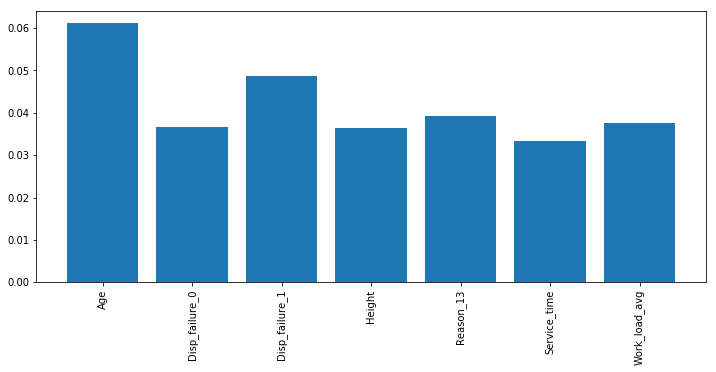

In [184]:
##  Select the features based on feature_importance

cols = predictors.columns.tolist()
ft_list_selected = []
ft_imp_selected = []

for i in range(len(cols)):
    if ft_imp[i] >= 0.03:
        ft_list_selected.append(cols[i])
        ft_imp_selected.append(round(ft_imp[i],4))
        
print(ft_list_selected)
print(ft_imp_selected)

plt.figure(figsize = (12,5))
plt.bar(ft_list_selected, ft_imp_selected)
plt.xticks(rotation = 90)

                            Checking the performance of Neural Network Regression

X train size: (589, 76)
X test size: (148, 76)
y train size: (589,)
y test size: (148,)

train rmse: 13.423661135943457
test rmse: 10.04020851243157
train R2 : 0.07991051294053819
test  R2 : 0.04742164363553292


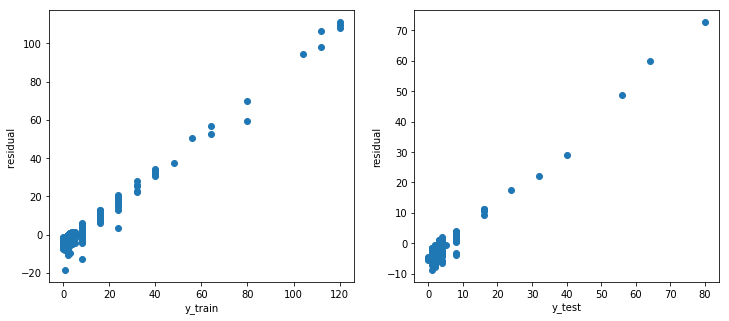

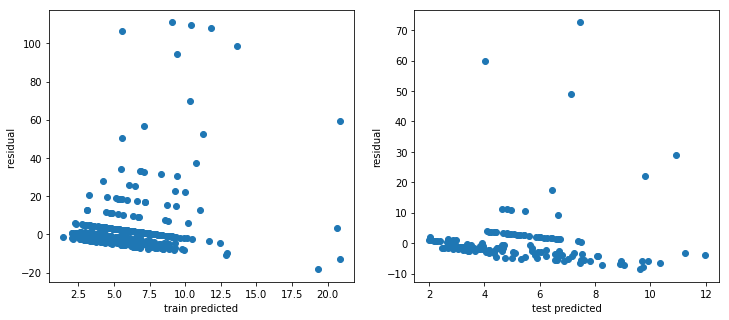

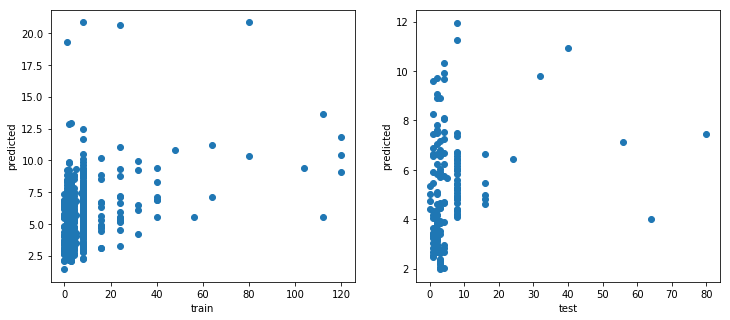

In [128]:
cat_var = ['Reason','Son','Social_drinker', 'Pet', 'Education', 'Social_smoker', 'Disp_failure', 'Seasons', 'Month', 'Day']
#correlated_var = ['Reason','Son','Social_drinker', 'Height', 'Residence_to_work_dist','Age','Disp_failure','Bmi', 'Transport_expense']

correlated_var = ['Reason','Son','Social_drinker', 'Pet', 'Education', 'Social_smoker', 'Disp_failure', 'Seasons', 'Month', 'Day','Height', 'Residence_to_work_dist','Age','Bmi', 'Transport_expense','Work_load_avg']

predictors = absentee_data[correlated_var]
predictors = hot_encode(predictors, cat_var)

target = absentee_data['Absentee_hours']
nn = MLPRegressor(hidden_layer_sizes = (128,128) , max_iter = 1000 , random_state = 10)
perform_reg(nn,predictors,target )

In [151]:
## Check the performance of Neural Network with scaled inputs.

cat_var = ['Reason','Day','Son','Social_drinker','Disp_failure','Seasons','Hit_target','Pet','Month','Social_smoker','Education']
cont_var = ['Height','Residence_to_work_dist','Age','Bmi', 'Transport_expense', 'Weight','Age_Bmi','Sick_children','Work_load_avg','Hit_target','Absentee_hours','Absentee_hrs_5thR']

to_be_scaled = absentee_data[cont_var]

scaler = MinMaxScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(to_be_scaled))

scaled_data.columns = to_be_scaled.columns.tolist()
scaled_data.head()

,Height,Residence_to_work_dist,Age,Bmi,Transport_expense,Weight,Age_Bmi,Sick_children,Work_load_avg,Hit_target,Absentee_hours,Absentee_hrs_5thR
0,0.272727,0.659574,0.193548,0.578947,0.633333,0.653846,0.353383,0.360,0.194471,0.842105,0.033333,0.506496
1,0.454545,0.170213,0.741935,0.631579,0.000000,0.807692,0.821220,0.065,0.194471,0.842105,0.000000,0.000000
2,0.212121,0.978723,0.354839,0.631579,0.225926,0.634615,0.510443,0.000,0.194471,0.842105,0.016667,0.440930
3,0.151515,0.000000,0.387097,0.263158,0.596296,0.230769,0.308271,0.050,0.194471,0.842105,0.033333,0.506496
4,0.272727,0.659574,0.193548,0.578947,0.633333,0.653846,0.353383,0.360,0.194471,0.842105,0.016667,0.440930


In [152]:
scaled_data['Reason'] = absentee_data['Reason'].values
scaled_data['Day'] = absentee_data['Day'].values
scaled_data['Son'] = absentee_data['Son'].values
scaled_data['Social_drinker'] = absentee_data['Social_drinker'].values
scaled_data['Seasons'] = absentee_data['Seasons'].values
scaled_data['Disp_failure'] = absentee_data['Disp_failure'].values
scaled_data['Hit_target'] = absentee_data['Hit_target'].values
scaled_data['Pet'] = absentee_data['Pet'].values
scaled_data['Month'] = absentee_data['Month'].values
scaled_data['Social_smoker'] = absentee_data['Social_smoker'].values
scaled_data['Education'] = absentee_data['Education'].values



In [153]:
scaled_data.head()

,Height,Residence_to_work_dist,Age,Bmi,Transport_expense,Weight,Age_Bmi,Sick_children,Work_load_avg,Hit_target,...,Reason,Day,Son,Social_drinker,Seasons,Disp_failure,Pet,Month,Social_smoker,Education
0,0.272727,0.659574,0.193548,0.578947,0.633333,0.653846,0.353383,0.360,0.194471,97,...,26,3,2,1,1,0,1,7,0,1
1,0.454545,0.170213,0.741935,0.631579,0.000000,0.807692,0.821220,0.065,0.194471,97,...,0,3,1,1,1,1,0,7,0,1
2,0.212121,0.978723,0.354839,0.631579,0.225926,0.634615,0.510443,0.000,0.194471,97,...,23,4,0,1,1,0,0,7,0,1
3,0.151515,0.000000,0.387097,0.263158,0.596296,0.230769,0.308271,0.050,0.194471,97,...,7,5,2,1,1,0,0,7,1,1
4,0.272727,0.659574,0.193548,0.578947,0.633333,0.653846,0.353383,0.360,0.194471,97,...,23,5,2,1,1,0,1,7,0,1


In [154]:
scaled_data = hot_encode(scaled_data , cat_var)

In [155]:
scaled_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 737 entries, 0 to 736
Data columns (total 94 columns):
Height                    737 non-null float64
Residence_to_work_dist    737 non-null float64
Age                       737 non-null float64
Bmi                       737 non-null float64
Transport_expense         737 non-null float64
Weight                    737 non-null float64
Age_Bmi                   737 non-null float64
Sick_children             737 non-null float64
Work_load_avg             737 non-null float64
Absentee_hours            737 non-null float64
Absentee_hrs_5thR         737 non-null float64
Reason_0                  737 non-null uint8
Reason_1                  737 non-null uint8
Reason_2                  737 non-null uint8
Reason_3                  737 non-null uint8
Reason_4                  737 non-null uint8
Reason_5                  737 non-null uint8
Reason_6                  737 non-null uint8
Reason_7                  737 non-null uint8
Reason_8          

X train size: (589, 92)
X test size: (148, 92)
y train size: (589,)
y test size: (148,)

train rmse: 0.043681790102384134
test rmse: 0.10970547748646542
train R2 : 0.8597020080399103
test  R2 : -0.6377000463636915


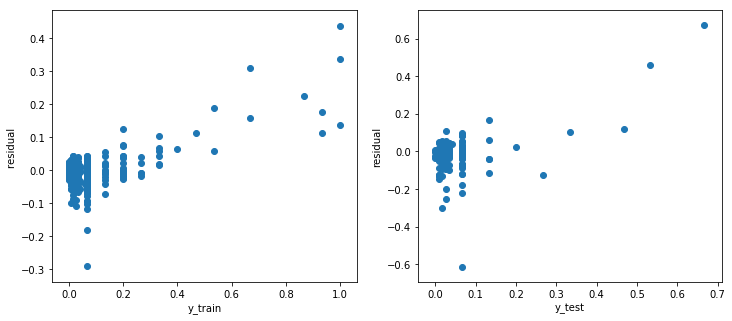

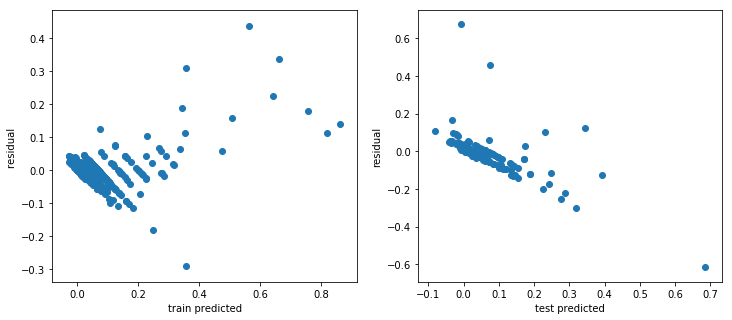

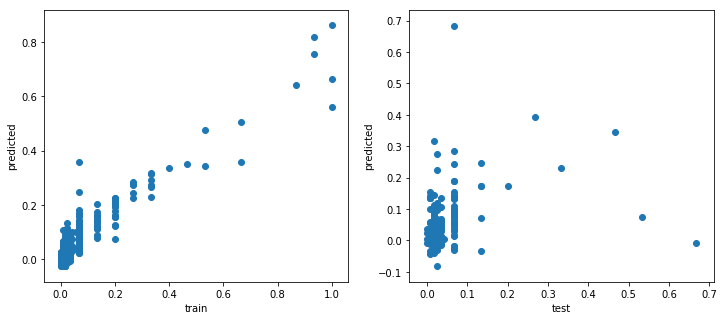

In [156]:
target = scaled_data['Absentee_hours']
predictors = scaled_data.drop(['Absentee_hours','Absentee_hrs_5thR'], axis = 1)
nn = MLPRegressor(hidden_layer_sizes = (128,128) , max_iter = 1000 , random_state = 10)
perform_reg(nn,predictors,target )

X train size: (589, 92)
X test size: (148, 92)
y train size: (589,)
y test size: (148,)

train rmse: 0.05197107425050673
test rmse: 0.10098164212383595
train R2 : 0.9013014481172027
test  R2 : 0.3827299689018183


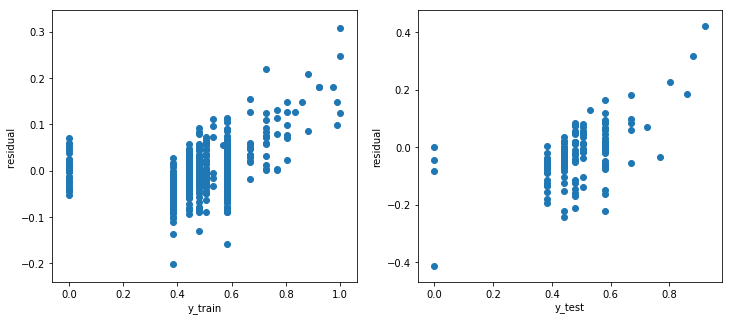

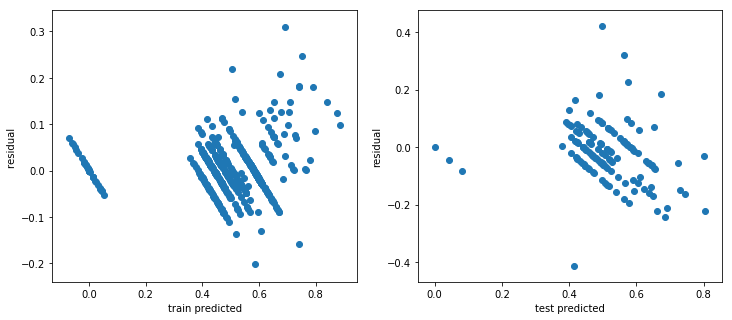

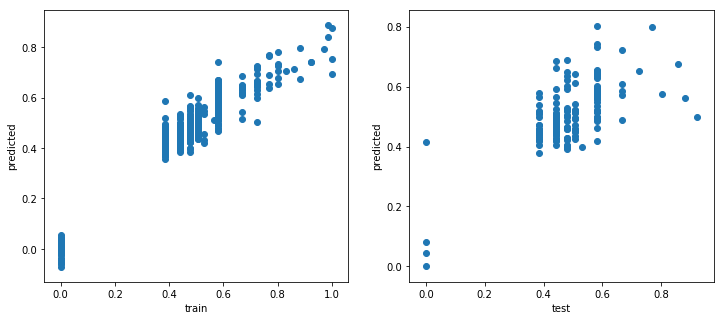

In [157]:
## Neural Network Regression on transformed response
target = scaled_data['Absentee_hrs_5thR']
predictors = scaled_data.drop(['Absentee_hours','Absentee_hrs_5thR'], axis = 1)
nn = MLPRegressor(hidden_layer_sizes = (128,128) , max_iter = 1000 , random_state = 10)
perform_reg(nn,predictors,target )

X_train size : (500, 92)
y_train size : (500,)
X_validate size : (126, 92)
y_validate size : (126,)
X_test size : (111, 92)
y_test size : (111,)

train rmse: 0.09902841320647365
test rmse: 0.11442850644765205
train R2 : 0.6351222467291299
test  R2 : 0.4838614931627171

train rmse: 0.08692386779882831
test rmse: 0.08481877159196671
train R2 : 0.7188708820169523
test  R2 : 0.7164159771612554

train rmse: 0.09125234208156835
test rmse: 0.10718972270416062
train R2 : 0.6901754807048659
test  R2 : 0.5470981475393453

train rmse: 0.0826512612888396
test rmse: 0.107607277314022
train R2 : 0.7458285797251851
test  R2 : 0.5435627415251791

train rmse: 0.062407799343388026
test rmse: 0.09659815515805838
train R2 : 0.855087622459728
test  R2 : 0.6321798926692976

train rmse: 0.06508784748375951
test rmse: 0.08237804658093752
train R2 : 0.8423741057985799
test  R2 : 0.7325018511447361


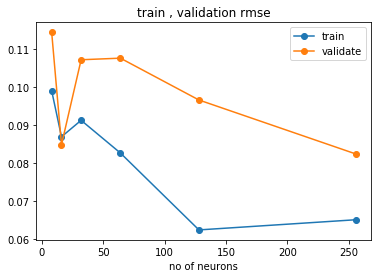

Least rmse:0.082 no of neurons  :256


In [158]:
## Parameter Selection for Neural Network .
## Vary the number of neurons , single layer 

X_trainval,X_test , y_trainval,y_test = train_test_split(predictors,target , random_state = 1, test_size = 0.15)
X_train,X_validate , y_train,y_validate = train_test_split(X_trainval,y_trainval , random_state = 0, test_size = 0.2)

print("X_train size : {}".format(X_train.shape))
print("y_train size : {}".format(y_train.shape))

print("X_validate size : {}".format(X_validate.shape))
print("y_validate size : {}".format(y_validate.shape))

print("X_test size : {}".format(X_test.shape))
print("y_test size : {}".format(y_test.shape))

neurons = [8,16,32,64,128,256]
train_rmse = {}
validation_rmse = {}

for n in neurons:
    nn = MLPRegressor(hidden_layer_sizes = (n,) , max_iter = 1000 , random_state = 10)
    train_rmse[n], validation_rmse[n] = fit_model(nn, X_train, X_validate , y_train , y_validate )
    
plt.plot(neurons , train_rmse.values(), 'o-', label = 'train')
plt.plot(neurons , validation_rmse.values(), 'o-', label = 'validate')
plt.legend()
plt.title("train , validation rmse")
plt.xlabel("no of neurons")
plt.show()

best_neuron = min(validation_rmse , key = validation_rmse.get)
print("Least rmse:{:.3f}".format(validation_rmse[best_neuron]) + " " + "no of neurons  :{}".format(best_neuron))


X_train size : (414, 92)
y_train size : (414,)
X_validate size : (138, 92)
y_validate size : (138,)
X_test size : (185, 92)
y_test size : (185,)

train rmse: 0.10859199240183791
test rmse: 0.13517138623963348
train R2 : 0.5521721169149146
test  R2 : 0.37892540640686523

train rmse: 0.09128781633782308
test rmse: 0.13782646953541383
train R2 : 0.683523720169033
test  R2 : 0.3542870567178955

train rmse: 0.07494460768810922
test rmse: 0.12370923512883478
train R2 : 0.7866973216598997
test  R2 : 0.47979026882313836

train rmse: 0.24044815009795545
test rmse: 0.23645616100539144
train R2 : -1.1956262173387073
test  R2 : -0.9005333595807088

train rmse: 0.047199935356211656
test rmse: 0.1167835705204817
train R2 : 0.9153945508658162
test  R2 : 0.5364060851195093

train rmse: 0.04283210394269469
test rmse: 0.10959960012012052
train R2 : 0.9303286311741806
test  R2 : 0.5916879774714867


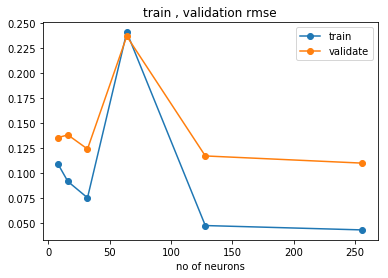

Least rmse:0.110 no of neurons  :256


In [159]:
## Parameter Selection for Neural Network .
## Vary the number of neurons , two layer 

X_trainval,X_test , y_trainval,y_test = train_test_split(predictors,target , random_state = 1, test_size = 0.25)
X_train,X_validate , y_train,y_validate = train_test_split(X_trainval,y_trainval , random_state = 0, test_size = 0.25)

print("X_train size : {}".format(X_train.shape))
print("y_train size : {}".format(y_train.shape))

print("X_validate size : {}".format(X_validate.shape))
print("y_validate size : {}".format(y_validate.shape))

print("X_test size : {}".format(X_test.shape))
print("y_test size : {}".format(y_test.shape))

neurons = [8,16,32,64,128,256]
train_rmse = {}
validation_rmse = {}

for n in neurons:
    nn = MLPRegressor(hidden_layer_sizes = (n,n) , max_iter = 1000 , random_state = 10)
    train_rmse[n], validation_rmse[n] = fit_model(nn, X_train, X_validate , y_train , y_validate )
    
plt.plot(neurons , train_rmse.values(), 'o-', label = 'train')
plt.plot(neurons , validation_rmse.values(), 'o-', label = 'validate')
plt.legend()
plt.title("train , validation rmse")
plt.xlabel("no of neurons")
plt.show()

best_neuron = min(validation_rmse , key = validation_rmse.get)
print("Least rmse:{:.3f}".format(validation_rmse[best_neuron]) + " " + "no of neurons  :{}".format(best_neuron))


X_train size : (500, 92)
y_train size : (500,)
X_validate size : (126, 92)
y_validate size : (126,)
X_test size : (111, 92)
y_test size : (111,)

train rmse: 0.10950199055728829
test rmse: 0.10328349226445976
train R2 : 0.5538593735580188
test  R2 : 0.5795061674592752

train rmse: 0.10039493337356559
test rmse: 0.09977234748316632
train R2 : 0.6249826708358897
test  R2 : 0.6076097718984512

train rmse: 0.07005345965115872
test rmse: 0.07621128191729196
train R2 : 0.8174058240365217
test  R2 : 0.7710522732414167

train rmse: 0.1411075922970579
test rmse: 0.12537687690255922
train R2 : 0.2591530316608335
test  R2 : 0.3803696278870742

train rmse: 0.05332628153998578
test rmse: 0.07388628440542705
train R2 : 0.8941939875511185
test  R2 : 0.7848083295639768

train rmse: 0.036147552193928296
test rmse: 0.06996331536340139
train R2 : 0.9513832938140392
test  R2 : 0.8070527626025137


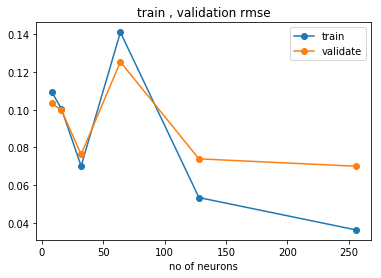

Least rmse:0.070 no of neurons  :256


In [160]:
## Parameter Selection for Neural Network .
## Vary the number of neurons , three layer 

X_trainval,X_test , y_trainval,y_test = train_test_split(predictors,target , random_state = 1, test_size = 0.15)
X_train,X_validate , y_train,y_validate = train_test_split(X_trainval,y_trainval , random_state = 0, test_size = 0.2)

print("X_train size : {}".format(X_train.shape))
print("y_train size : {}".format(y_train.shape))

print("X_validate size : {}".format(X_validate.shape))
print("y_validate size : {}".format(y_validate.shape))

print("X_test size : {}".format(X_test.shape))
print("y_test size : {}".format(y_test.shape))

neurons = [8,16,32,64,128,256]
train_rmse = {}
validation_rmse = {}

for n in neurons:
    nn = MLPRegressor(hidden_layer_sizes = (n,n,n) , max_iter = 1000 , random_state = 10)
    train_rmse[n], validation_rmse[n] = fit_model(nn, X_train, X_validate , y_train , y_validate )
    
plt.plot(neurons , train_rmse.values(), 'o-', label = 'train')
plt.plot(neurons , validation_rmse.values(), 'o-', label = 'validate')
plt.legend()
plt.title("train , validation rmse")
plt.xlabel("no of neurons")
plt.show()

best_neuron = min(validation_rmse , key = validation_rmse.get)
print("Least rmse:{:.3f}".format(validation_rmse[best_neuron]) + " " + "no of neurons  :{}".format(best_neuron))


256 neuron three hidden  layer NN performs the best with the least validation RMSE .

Test rmse: 0.090
Test set score :0.505


Text(0,0.5,'residual')

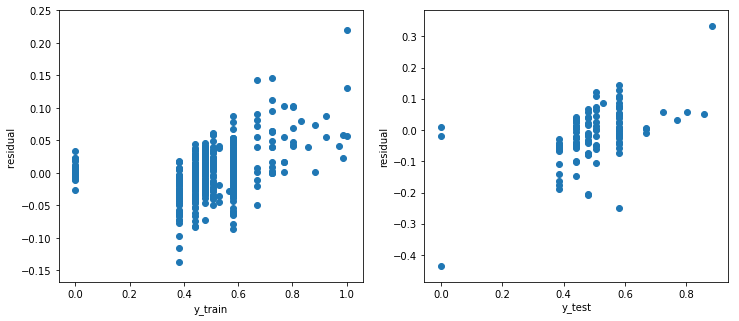

In [161]:
## Check the model on test data with the above selected parameters

nn = MLPRegressor(hidden_layer_sizes = (256,256,256) , max_iter = 1000 , random_state = 10)
nn.fit(X_train,y_train)
train_pred = nn.predict(X_train)
test_pred = nn.predict(X_test)

print("Test rmse: {:.3f}".format(np.sqrt(mean_squared_error(y_test,test_pred))))
print("Test set score :{:.3f}".format(r2_score(y_test,test_pred)))

## Check for any pattern in the Residual Vs Response plot 

train_resid = y_train - train_pred
test_resid = y_test - test_pred

plt.figure(figsize = (12,5))
plt.subplot(121)
plt.scatter(y_train , train_resid)
plt.xlabel("y_train")
plt.ylabel("residual ")

plt.subplot(122)
plt.scatter(y_test , test_resid)
plt.xlabel('y_test')
plt.ylabel("residual")



In [171]:
## Cross validate and check the performance  

nn = MLPRegressor(hidden_layer_sizes = (256,256,256) , max_iter = 1000 , random_state = 10)

kf = KFold(n_splits = 5 , shuffle = True , random_state = 3)
scores = cross_val_score(nn, predictors , target , cv = kf )
print(" 5 fold cross validation scores : {}".format(scores))

print("Mean score with 5 fold cross validation :{}".format(np.mean(cross_val_score(nn,predictors, target , cv = kf ))))

 5 fold cross validation scores : [ 0.71333652  0.69118731  0.65069196  0.69571517  0.67258978]
Mean score with 5 fold cross validation :0.684704146750354


Neural Network does not imporive the prediction accuracy as shown above.

Summary : 

The test data performance of the various models by regressing the 5th root of Absentee_hours are:

1. Linear Regression - Cross Val Score 0.68
2. Lasso Regression - Cross Val Score 0.6335
3. Decision Trees - Cross Val Score 0.6821
4. Random Forest - Cross Val Score 0.69
5. Gradient Boosting - Cross Val Score 0.677
6. Neural Network - Cross Val Score 0.68

Future Work :

1. We see the need for more features that help in reducing the errors in prediction . 
2.Also , to look into deriving features from reason code so that they can be omitted from the model.
3. Look into why and how is there a large disparity in absentee hours .  